# Transport Problems with Sparse Grids

We apply the stochastic collocation method using sparse grids to the linear transport equation in the case of a stochastically modeled initial conditions $\rho_{0} \colon \Omega \times \overline{D} \longrightarrow \mathbb{R}^{d}$. We search for the desity $\rho \colon \Omega \times [0, T] \times \overline{D} \longrightarrow \mathbb{R}$, such that

\begin{align}
\partial_t \rho (\omega) + \text{div}(\rho(\omega)q(\omega)) &= 0, \quad \text{in } (0, T) \times D, \\
                                                   \rho(t=0) &= \rho_0 \quad \text{in } D
\end{align}

with the inflow boundary conditon

\begin{align}
   \rho = \rho_{\text{in}} \quad \text{on } [0, T] \times \Gamma_{\text{in}} = \{ x \in \partial D \colon q \cdot n < 0 \}
\end{align}

on a suitable probability space $(\Omega, \mathcal{F}_\Omega , \mathbb{P})$.


In [1]:
import sys
sys.path.append('..')
from python.mluqmppy import *


================ running cmake ================

-- A library with LAPACK API found.
-- Checking for LAPACK LQ factorization: found
-- 
-- Tasmanian 7.6 (development): summary of build options
--  -D CMAKE_BUILD_TYPE:STRING=Release
--  -D CMAKE_INSTALL_PREFIX:PATH=/home/chinsp/mlmc/build
--  -D CMAKE_CXX_FLAGS:STRING=
--  -D BUILD_SHARED_LIBS=ON
--  -D Tasmanian_ENABLE_OPENMP:BOOL=TRUE
--  -D Tasmanian_ENABLE_BLAS:BOOL=ON
--  -D Tasmanian_ENABLE_MPI:BOOL=ON
--  -D Tasmanian_ENABLE_PYTHON:BOOL=ON
--  -D Tasmanian_ENABLE_CUDA:BOOL=OFF
--  -D Tasmanian_ENABLE_MAGMA:BOOL=OFF
--  -D Tasmanian_ENABLE_HIP:BOOL=OFF
--  -D Tasmanian_ENABLE_DPCPP:BOOL=OFF
--  -D Tasmanian_ENABLE_SWIG:BOOL=OFF
--  -D Tasmanian_ENABLE_FORTRAN:BOOL=OFF
--  -D Tasmanian_ENABLE_DOXYGEN:BOOL=OFF
-- 
-- Project directory= /home/chinsp/mlmc
-- Mpp directory= /home/chinsp/mlmc/mpp
-- Setting prepare commit message hook to mpp
   file: /home/chinsp/mlmc/mpp/doc/../../.git/modules/mpp/hooks/prepare-commit-msg
-- Failed to

0

## Examples

### Example 1
In this example we transport gaussian function with uncertain mean value i.e. 
$$ \rho_{0}(x,\omega) = \frac{1}{\sqrt{(2\pi)^{2}}}det(\Sigma)^{-1/2}exp\left(-\frac{(x-\mu(t) + \omega)^{\top}\Sigma^{-1}(x-\mu(t) + \omega)}{2}\right), \quad x \in[0,1]^{2}, \omega \sim U([0,0.1]^{2})  $$

$$ q(x, \omega) = \left(cos(\frac{\pi x_{1}}{2}),sin(\frac{\pi x_{2}}{2})^{\top}\right) $$

where, $\Sigma = \begin{pmatrix} 0.005 & 0.0\\ 0.0 & 0.005 \end{pmatrix}$, $0\leq t\leq T = 1.0$, $ \mu = (0.25 +  t,0.25 + t)  $ and $\rho_{in} = 0$.

In [12]:
mpp.reset_data()
mpp.clean_data()

stochLevel = 3 
meshLevel = 4 
kwargs = {"Problem": "StochasticSGGaussHat2D",
          "Estimator": "SC",
          "stochLevel": stochLevel,
          "Level": meshLevel,
          "AssembleVerbose":   3,
          "PDESolverVerbose":  1,
          "PDESolverPlotting": 1}

mpp.run(2,config="stoch_transport", kwargs = kwargs)
mpp.parse_log()


================ running  mpp ================

start program on 2 procs at Mon Nov 22 16:21:55 2021
Running on: chinsp-HP-348-G4
   Config Info:
     TimeIntegratorVerbose: ................... 0
     AssembleVerbose: ......................... 3
     NewtonVerbose: ........................... 0
     LinearVerbose: ........................... 0
     ConfigVerbose: ........................... 1
     MeshesVerbose: ........................... 0
     MeshVerbose: ............................. 0
     MainVerbose: ............................. 1
     scaling: ................................. 8
     smoothing: ............................... 1.0
     TimeSeries: .............................. uniform
     Model: ................................... DGTransport
     rkorder: ................................. -2
     Overlap: ................................. dG1
     flux_alpha: .............................. 1
     stochLevel: .............................. 3
     startTime: ................

       TI: n=66  t=1.03125       Energy=4.3860286     Mass=0.58690312    IFR=0.0011405726  OFR=0.05277153    
       TI: n=67  t=1.046875      Energy=4.2385648     Mass=0.56942388    IFR=0.001595866   OFR=0.045359091   
       TI: n=68  t=1.0625        Energy=4.0941699     Mass=0.55223386    IFR=0             OFR=0.038458713   
       TI: n=69  t=1.078125      Energy=3.9532331     Mass=0.53534277    IFR=0             OFR=0.032849501   
       TI: n=70  t=1.09375       Energy=3.8158594     Mass=0.51875932    IFR=0             OFR=0.029107203   
       TI: n=71  t=1.109375      Energy=3.681833      Mass=0.5024912     IFR=0             OFR=0.027538957   
       TI: n=72  t=1.125         Energy=3.5507537     Mass=0.48654512    IFR=0             OFR=0.028158662   
       TI: n=73  t=1.140625      Energy=3.4222422     Mass=0.47092688    IFR=0             OFR=0.030703519   
       TI: n=74  t=1.15625       Energy=3.2960887     Mass=0.45564134    IFR=0             OFR=0.034686198   
       TI:

       TI: n=18  t=0.5625        Energy=6.6257332     Mass=0.84159277    IFR=0.0082751593  OFR=1.2945611e-06 
       TI: n=19  t=0.59375       Energy=6.3958946     Mass=0.8173011     IFR=0             OFR=1.2485113e-05 
       TI: n=20  t=0.625         Energy=6.1590097     Mass=0.79370544    IFR=0             OFR=0.00010193888 
       TI: n=21  t=0.65625       Energy=5.9205198     Mass=0.77368698    IFR=0             OFR=0.00056336106 
       TI: n=22  t=0.6875        Energy=5.7030761     Mass=0.76213146    IFR=0             OFR=0.0021962742  
       TI: n=23  t=0.71875       Energy=5.5795697     Mass=0.76407133    IFR=0             OFR=0.0061945249  
       TI: n=24  t=0.75          Energy=5.665821      Mass=0.77948465    IFR=0             OFR=0.012907423   
       TI: n=25  t=0.78125       Energy=5.9355998     Mass=0.79891482    IFR=0             OFR=0.020402762   
       TI: n=26  t=0.8125        Energy=6.0729419     Mass=0.80772629    IFR=0             OFR=0.025549337   
       TI:

       TI: n=28  t=0.4375        Energy=6.6219257     Mass=0.83921145    IFR=0             OFR=0             
       TI: n=29  t=0.453125      Energy=6.5156896     Mass=0.82638524    IFR=0             OFR=0             
       TI: n=30  t=0.46875       Energy=6.4069164     Mass=0.81325541    IFR=0             OFR=0             
       TI: n=31  t=0.484375      Energy=6.2957795     Mass=0.79984574    IFR=0             OFR=0             
       TI: n=32  t=0.5           Energy=6.1824526     Mass=0.78618091    IFR=0             OFR=0             
       TI: n=33  t=0.515625      Energy=6.067113      Mass=0.7722875     IFR=0             OFR=0             
       TI: n=34  t=0.53125       Energy=5.9499447     Mass=0.75819596    IFR=0             OFR=0             
       TI: n=35  t=0.546875      Energy=5.8311413     Mass=0.7439446     IFR=0             OFR=2.3228041e-07 
       TI: n=36  t=0.5625        Energy=5.7109084     Mass=0.72958672    IFR=0             OFR=8.5495192e-07 
       TI:

       TI: n=119 t=1.859375      Energy=0.19696373    Mass=0.043756366   IFR=0.00035019155 OFR=0.0027706105  
       TI: n=120 t=1.875         Energy=0.18402909    Mass=0.041778831   IFR=0.00011680023 OFR=0.0024167605  
       TI: n=121 t=1.890625      Energy=0.17174573    Mass=0.039887838   IFR=0             OFR=0.0021343058  
       TI: n=122 t=1.90625       Energy=0.16010228    Mass=0.038079841   IFR=0             OFR=0.0019191171  
       TI: n=123 t=1.921875      Energy=0.14908903    Mass=0.036351419   IFR=0             OFR=0.0017667798  
       TI: n=124 t=1.9375        Energy=0.1386971     Mass=0.034699271   IFR=0             OFR=0.0016724295  
       TI: n=125 t=1.953125      Energy=0.12891708    Mass=0.033120218   IFR=0             OFR=0.0016305927  
       TI: n=126 t=1.96875       Energy=0.11973762    Mass=0.031611195   IFR=0             OFR=0.001635097   
       TI: n=127 t=1.984375      Energy=0.11114441    Mass=0.030169254   IFR=0             OFR=0.001679093   
       TI:

       TI: n=12  t=0.1875        Energy=8.3600868     Mass=1.0331441     IFR=0             OFR=0             
       TI: n=13  t=0.203125      Energy=8.3708031     Mass=1.0343347     IFR=0             OFR=0             
       TI: n=14  t=0.21875       Energy=8.3776444     Mass=1.0350469     IFR=0             OFR=0             
       TI: n=15  t=0.234375      Energy=8.38061       Mass=1.035282      IFR=0             OFR=0             
       TI: n=16  t=0.25          Energy=8.3797045     Mass=1.0350418     IFR=0             OFR=0             
       TI: n=17  t=0.265625      Energy=8.3749382     Mass=1.0343289     IFR=0             OFR=0             
       TI: n=18  t=0.28125       Energy=8.3663257     Mass=1.033146      IFR=0             OFR=0             
       TI: n=19  t=0.296875      Energy=8.3538857     Mass=1.0314966     IFR=0             OFR=0             
       TI: n=20  t=0.3125        Energy=8.337641      Mass=1.0293846     IFR=0             OFR=0             
       TI:

       TI: n=103 t=1.609375      Energy=1.5516037     Mass=0.262665      IFR=0             OFR=0.033201625   
       TI: n=104 t=1.625         Energy=1.4849446     Mass=0.253832      IFR=0             OFR=0.03371634    
       TI: n=105 t=1.640625      Energy=1.4204042     Mass=0.24526499    IFR=0             OFR=0.033651125   
       TI: n=106 t=1.65625       Energy=1.3577475     Mass=0.2369584     IFR=0             OFR=0.033034959   
       TI: n=107 t=1.671875      Energy=1.2967838     Mass=0.22890657    IFR=0             OFR=0.031922938   
       TI: n=108 t=1.6875        Energy=1.2373725     Mass=0.22110382    IFR=0             OFR=0.030389456   
       TI: n=109 t=1.703125      Energy=1.1794204     Mass=0.21354445    IFR=0             OFR=0.028521005   
       TI: n=110 t=1.71875       Energy=1.1228732     Mass=0.20622271    IFR=0             OFR=0.026409136   
       TI: n=111 t=1.734375      Energy=1.0677063     Mass=0.19913288    IFR=0             OFR=0.024144075   
       TI:

       TI: n=57  t=1.78125       Energy=0.45099386    Mass=0.18223       IFR=0             OFR=0.015933692   
       TI: n=58  t=1.8125        Energy=0.39768749    Mass=0.17000337    IFR=0             OFR=0.016537954   
       TI: n=59  t=1.84375       Energy=0.35154986    Mass=0.15855808    IFR=0             OFR=0.016873218   
       TI: n=60  t=1.875         Energy=0.31169118    Mass=0.14785181    IFR=0             OFR=0.016989655   
       TI: n=61  t=1.90625       Energy=0.27715899    Mass=0.13784345    IFR=0             OFR=0.016938283   
       TI: n=62  t=1.9375        Energy=0.24698543    Mass=0.12849323    IFR=0             OFR=0.016763402   
       TI: n=63  t=1.96875       Energy=0.2202839     Mass=0.1197628     IFR=0             OFR=0.016498813   
       TI: n=64  t=2             Energy=0.1963459     Mass=0.11161535    IFR=0             OFR=0.016167101   
     SSC4: U.4.1.2 Q=0.11161535 C=360 W=1
       TI: n=0   t=0             Energy=7.9434635     Mass=0.99719556    IFR=0

       TI: n=87  t=1.359375      Energy=1.311317      Mass=0.20717535    IFR=0.00097556213 OFR=0.014692453   
       TI: n=88  t=1.375         Energy=1.2466028     Mass=0.19892925    IFR=0.0012287305  OFR=0.011973367   
       TI: n=89  t=1.390625      Energy=1.1848297     Mass=0.19096529    IFR=0.0011463191  OFR=0.01000557    
       TI: n=90  t=1.40625       Energy=1.12599       Mass=0.18327727    IFR=0.00080639629 OFR=0.008799361   
       TI: n=91  t=1.421875      Energy=1.0700284     Mass=0.17585888    IFR=0.00033303342 OFR=0.0083093597  
       TI: n=92  t=1.4375        Energy=1.0168607     Mass=0.16870371    IFR=0             OFR=0.008447531   
       TI: n=93  t=1.453125      Energy=0.96638879    Mass=0.16180525    IFR=0             OFR=0.0090970189  
       TI: n=94  t=1.46875       Energy=0.91850797    Mass=0.15515693    IFR=0             OFR=0.010125305   
       TI: n=95  t=1.484375      Energy=0.87311026    Mass=0.14875215    IFR=0             OFR=0.011395719   
       TI:

       TI: n=3   t=0.046875      Energy=8.0841048     Mass=1.006341      IFR=0             OFR=0             
       TI: n=4   t=0.0625        Energy=8.124357      Mass=1.0113198     IFR=0             OFR=0             
       TI: n=5   t=0.078125      Energy=8.1605761     Mass=1.015767      IFR=0             OFR=0             
       TI: n=6   t=0.09375       Energy=8.192745      Mass=1.0196987     IFR=0             OFR=0             
       TI: n=7   t=0.109375      Energy=8.2208541     Mass=1.0231212     IFR=0             OFR=0             
       TI: n=8   t=0.125         Energy=8.244897      Mass=1.0260363     IFR=0             OFR=0             
       TI: n=9   t=0.140625      Energy=8.2648678     Mass=1.0284443     IFR=0             OFR=0             
       TI: n=10  t=0.15625       Energy=8.2807594     Mass=1.0303447     IFR=0             OFR=0             
       TI: n=11  t=0.171875      Energy=8.2925631     Mass=1.0317374     IFR=0             OFR=0             
       TI:

       TI: n=96  t=1.5           Energy=1.7913587     Mass=0.29003723    IFR=0             OFR=0.017957683   
       TI: n=97  t=1.515625      Energy=1.7123909     Mass=0.28003758    IFR=0             OFR=0.020246788   
       TI: n=98  t=1.53125       Energy=1.636969      Mass=0.27033536    IFR=0             OFR=0.02267738    
       TI: n=99  t=1.546875      Energy=1.5649052     Mass=0.26092524    IFR=0             OFR=0.025051791   
       TI: n=100 t=1.5625        Energy=1.4960046     Mass=0.25180173    IFR=0             OFR=0.027201096   
       TI: n=101 t=1.578125      Energy=1.4300581     Mass=0.24295919    IFR=0.00042413396 OFR=0.028990743   
       TI: n=102 t=1.59375       Energy=1.3668383     Mass=0.23439185    IFR=0.0007938301  OFR=0.030323377   
       TI: n=103 t=1.609375      Energy=1.3061013     Mass=0.22609388    IFR=0.00083244035 OFR=0.031139267   
       TI: n=104 t=1.625         Energy=1.247598      Mass=0.21805934    IFR=0.00054007608 OFR=0.031414658   
       TI:

       TI: n=12  t=0.1875        Energy=7.8581782     Mass=0.98858955    IFR=0             OFR=0             
       TI: n=13  t=0.203125      Energy=7.8174336     Mass=0.98365922    IFR=0             OFR=0             
       TI: n=14  t=0.21875       Energy=7.7717478     Mass=0.97813008    IFR=0             OFR=0             
       TI: n=15  t=0.234375      Energy=7.7212036     Mass=0.97201353    IFR=0             OFR=0             
       TI: n=16  t=0.25          Energy=7.6658955     Mass=0.96532202    IFR=0             OFR=0             
       TI: n=17  t=0.265625      Energy=7.6059288     Mass=0.95806908    IFR=0             OFR=0             
       TI: n=18  t=0.28125       Energy=7.541418      Mass=0.95026923    IFR=0             OFR=0             
       TI: n=19  t=0.296875      Energy=7.4724861     Mass=0.94193796    IFR=0             OFR=0             
       TI: n=20  t=0.3125        Energy=7.3992644     Mass=0.93309168    IFR=0             OFR=0             
       TI:

       TI: n=103 t=1.609375      Energy=0.51930097    Mass=0.094195729   IFR=0.0011451306  OFR=0.01591961    
       TI: n=104 t=1.625         Energy=0.49362522    Mass=0.090105205   IFR=0.00072147153 OFR=0.015523869   
       TI: n=105 t=1.640625      Energy=0.46898201    Mass=0.086180653   IFR=0.00025764412 OFR=0.014910232   
       TI: n=106 t=1.65625       Energy=0.4452796     Mass=0.082416289   IFR=0             OFR=0.014116838   
       TI: n=107 t=1.671875      Energy=0.42244598    Mass=0.078806455   IFR=0             OFR=0.013186087   
       TI: n=108 t=1.6875        Energy=0.40042469    Mass=0.075345622   IFR=0             OFR=0.012161485   
       TI: n=109 t=1.703125      Energy=0.37917099    Mass=0.072028389   IFR=0             OFR=0.011084846   
       TI: n=110 t=1.71875       Energy=0.35865014    Mass=0.068849494   IFR=0             OFR=0.0099940445  
       TI: n=111 t=1.734375      Energy=0.33883772    Mass=0.065803806   IFR=0             OFR=0.0089214202  
       TI:

       TI: n=61  t=1.90625       Energy=0.077950848   Mass=0.038208907   IFR=0             OFR=0.011916107   
       TI: n=62  t=1.9375        Energy=0.068127561   Mass=0.034678278   IFR=0             OFR=0.011579543   
       TI: n=63  t=1.96875       Energy=0.059559567   Mass=0.03145474    IFR=0             OFR=0.011186102   
       TI: n=64  t=2             Energy=0.052042673   Mass=0.028513319   IFR=0             OFR=0.010748098   
     SSC4: U.4.1.5 Q=0.028513319 C=360 W=1
       TI: n=0   t=0             Energy=7.9434356     Mass=0.9966574     IFR=0             OFR=0             
       TI: n=1   t=0.015625      Energy=7.9765827     Mass=1.0013159     IFR=0             OFR=0             
       TI: n=2   t=0.03125       Energy=8.0048336     Mass=1.0051061     IFR=0             OFR=0             
       TI: n=3   t=0.046875      Energy=8.0282027     Mass=1.0081522     IFR=0             OFR=0             
       TI: n=4   t=0.0625        Energy=8.0466554     Mass=1.010524      IFR=

       TI: n=89  t=1.390625      Energy=1.4034784     Mass=0.22283562    IFR=0.0012920678  OFR=0.012485867   
       TI: n=90  t=1.40625       Energy=1.3351204     Mass=0.21416057    IFR=0.0010057631  OFR=0.010740973   
       TI: n=91  t=1.421875      Energy=1.2700329     Mass=0.20577524    IFR=0.00050726935 OFR=0.0098515369  
       TI: n=92  t=1.4375        Energy=1.2081217     Mass=0.19767353    IFR=0             OFR=0.0097366381  
       TI: n=93  t=1.453125      Energy=1.1492711     Mass=0.1898492     IFR=0             OFR=0.010274453   
       TI: n=94  t=1.46875       Energy=1.0933574     Mass=0.1822959     IFR=0             OFR=0.011317998   
       TI: n=95  t=1.484375      Energy=1.040255      Mass=0.17500718    IFR=0             OFR=0.012709458   
       TI: n=96  t=1.5           Energy=0.9898382     Mass=0.1679765     IFR=0             OFR=0.014292283   
       TI: n=97  t=1.515625      Energy=0.94198099    Mass=0.16119729    IFR=2.6207657e-05 OFR=0.015920686   
       TI:

       TI: n=6   t=0.09375       Energy=8.1605193     Mass=1.0202992     IFR=0             OFR=0             
       TI: n=7   t=0.109375      Energy=8.1818454     Mass=1.0229295     IFR=0             OFR=0             
       TI: n=8   t=0.125         Energy=8.1988408     Mass=1.0250211     IFR=0             OFR=0             
       TI: n=9   t=0.140625      Energy=8.2115025     Mass=1.0265745     IFR=0             OFR=0             
       TI: n=10  t=0.15625       Energy=8.2198271     Mass=1.0275901     IFR=0             OFR=0             
       TI: n=11  t=0.171875      Energy=8.2238104     Mass=1.0280684     IFR=0             OFR=0             
       TI: n=12  t=0.1875        Energy=8.2234491     Mass=1.0280108     IFR=0             OFR=0             
       TI: n=13  t=0.203125      Energy=8.2187432     Mass=1.0274188     IFR=0             OFR=0             
       TI: n=14  t=0.21875       Energy=8.2096982     Mass=1.0262953     IFR=0             OFR=0             
       TI:

       TI: n=97  t=1.515625      Energy=1.4330243     Mass=0.23848335    IFR=0             OFR=0.0193116     
       TI: n=98  t=1.53125       Energy=1.3675514     Mass=0.22975102    IFR=0             OFR=0.021513024   
       TI: n=99  t=1.546875      Energy=1.3051183     Mass=0.22129947    IFR=6.3581787e-05 OFR=0.023597845   
       TI: n=100 t=1.5625        Energy=1.2455499     Mass=0.21312263    IFR=0.0007610284  OFR=0.025424643   
       TI: n=101 t=1.578125      Energy=1.1886568     Mass=0.20521434    IFR=0.0012772497  OFR=0.026884905   
       TI: n=102 t=1.59375       Energy=1.1342312     Mass=0.19756836    IFR=0.0015176316  OFR=0.027904466   
       TI: n=103 t=1.609375      Energy=1.0820513     Mass=0.19017841    IFR=0.001442323   OFR=0.028442944   
       TI: n=104 t=1.625         Energy=1.031893      Mass=0.18303817    IFR=0.0010701331  OFR=0.028491469   
       TI: n=105 t=1.640625      Energy=0.98354606    Mass=0.17614132    IFR=0.00047128318 OFR=0.028069002   
       TI:

       TI: n=15  t=0.234375      Energy=8.3606191     Mass=1.0349184     IFR=0             OFR=0             
       TI: n=16  t=0.25          Energy=8.3577272     Mass=1.0344534     IFR=0             OFR=0             
       TI: n=17  t=0.265625      Energy=8.3509172     Mass=1.033509      IFR=0             OFR=0             
       TI: n=18  t=0.28125       Energy=8.3402053     Mass=1.0320883     IFR=0             OFR=0             
       TI: n=19  t=0.296875      Energy=8.3256122     Mass=1.0301952     IFR=0             OFR=0             
       TI: n=20  t=0.3125        Energy=8.3071625     Mass=1.0278337     IFR=0             OFR=0             
       TI: n=21  t=0.328125      Energy=8.284886      Mass=1.0250084     IFR=0             OFR=0             
       TI: n=22  t=0.34375       Energy=8.2588179     Mass=1.0217246     IFR=0             OFR=0             
       TI: n=23  t=0.359375      Energy=8.2289997     Mass=1.0179879     IFR=0             OFR=0             
       TI:

       TI: n=105 t=1.640625      Energy=1.356529      Mass=0.23582508    IFR=0             OFR=0.033036287   
       TI: n=106 t=1.65625       Energy=1.2959908     Mass=0.22771925    IFR=0             OFR=0.032380933   
       TI: n=107 t=1.671875      Energy=1.2371326     Mass=0.21986616    IFR=0             OFR=0.031244887   
       TI: n=108 t=1.6875        Energy=1.179819      Mass=0.21226       IFR=0             OFR=0.029702653   
       TI: n=109 t=1.703125      Energy=1.1239597     Mass=0.20489495    IFR=0             OFR=0.027839937   
       TI: n=110 t=1.71875       Energy=1.0695014     Mass=0.19776521    IFR=0             OFR=0.025746782   
       TI: n=111 t=1.734375      Energy=1.0164184     Mass=0.19086493    IFR=0             OFR=0.023511396   
       TI: n=112 t=1.75          Energy=0.96470838    Mass=0.18418834    IFR=0             OFR=0.021215082   
       TI: n=113 t=1.765625      Energy=0.91439008    Mass=0.17772965    IFR=0             OFR=0.01892856    
       TI:

       TI: n=61  t=1.90625       Energy=0.26283385    Mass=0.13101176    IFR=0             OFR=0.016834468   
       TI: n=62  t=1.9375        Energy=0.23392423    Mass=0.12197551    IFR=0             OFR=0.016661195   
       TI: n=63  t=1.96875       Energy=0.20834439    Mass=0.11354798    IFR=0             OFR=0.01639767    
       TI: n=64  t=2             Energy=0.18541566    Mass=0.10569228    IFR=0             OFR=0.016065831   
     SSC4: U.4.1.8 Q=0.10569228 C=360 W=1
       TI: n=0   t=0             Energy=7.9434622     Mass=0.99743154    IFR=0             OFR=0             
       TI: n=1   t=0.015625      Energy=7.9610852     Mass=0.99966361    IFR=0             OFR=0             
       TI: n=2   t=0.03125       Energy=7.9747462     Mass=1.0013757     IFR=0             OFR=0             
       TI: n=3   t=0.046875      Energy=7.9844394     Mass=1.0025837     IFR=0             OFR=0             
       TI: n=4   t=0.0625        Energy=7.9901472     Mass=1.0032949     IFR=0

       TI: n=89  t=1.390625      Energy=1.8110117     Mass=0.26961233    IFR=0.0010001453  OFR=0.015666908   
       TI: n=90  t=1.40625       Energy=1.7318155     Mass=0.25945629    IFR=7.4084829e-05 OFR=0.015053174   
       TI: n=91  t=1.421875      Energy=1.6557655     Mass=0.2496263     IFR=0             OFR=0.015513626   
       TI: n=92  t=1.4375        Energy=1.5825738     Mass=0.24011607    IFR=0             OFR=0.016857451   
       TI: n=93  t=1.453125      Energy=1.5120054     Mass=0.23091914    IFR=0             OFR=0.018859876   
       TI: n=94  t=1.46875       Energy=1.443881      Mass=0.22202885    IFR=0             OFR=0.021282925   
       TI: n=95  t=1.484375      Energy=1.3780707     Mass=0.21343842    IFR=0             OFR=0.023893043   
       TI: n=96  t=1.5           Energy=1.3144829     Mass=0.20514096    IFR=0             OFR=0.026475077   
       TI: n=97  t=1.515625      Energy=1.2530482     Mass=0.19712947    IFR=0.00068143533 OFR=0.028842568   
       TI:

       TI: n=5   t=0.078125      Energy=7.8853734     Mass=0.99252128    IFR=0             OFR=0             
       TI: n=6   t=0.09375       Energy=7.8598121     Mass=0.98939181    IFR=0             OFR=0             
       TI: n=7   t=0.109375      Energy=7.8297143     Mass=0.98570553    IFR=0             OFR=0             
       TI: n=8   t=0.125         Energy=7.7951362     Mass=0.98146866    IFR=0             OFR=0             
       TI: n=9   t=0.140625      Energy=7.756136      Mass=0.97668811    IFR=0             OFR=0             
       TI: n=10  t=0.15625       Energy=7.712772      Mass=0.97137166    IFR=0             OFR=0             
       TI: n=11  t=0.171875      Energy=7.6651039     Mass=0.96552791    IFR=0             OFR=0             
       TI: n=12  t=0.1875        Energy=7.6131954     Mass=0.95916635    IFR=0             OFR=0             
       TI: n=13  t=0.203125      Energy=7.5571167     Mass=0.95229728    IFR=0             OFR=0             
       TI:

       TI: n=97  t=1.515625      Energy=0.78641908    Mass=0.12398263    IFR=0.0014026766  OFR=0.023078812   
       TI: n=98  t=1.53125       Energy=0.74761076    Mass=0.11864659    IFR=0.0017093019  OFR=0.024091692   
       TI: n=99  t=1.546875      Energy=0.71027182    Mass=0.11352188    IFR=0.0017499258  OFR=0.02469428    
       TI: n=100 t=1.5625        Energy=0.67431665    Mass=0.10860161    IFR=0.0015200833  OFR=0.024870795   
       TI: n=101 t=1.578125      Energy=0.63966005    Mass=0.10387899    IFR=0.0010652392  OFR=0.024630777   
       TI: n=102 t=1.59375       Energy=0.60622834    Mass=0.09934735    IFR=0.0004689477  OFR=0.024005177   
       TI: n=103 t=1.609375      Energy=0.57396717    Mass=0.095000148   IFR=0             OFR=0.023041697   
       TI: n=104 t=1.625         Energy=0.54284292    Mass=0.09083096    IFR=0             OFR=0.021799697   
       TI: n=105 t=1.640625      Energy=0.51283798    Mass=0.086833499   IFR=0             OFR=0.020345006   
       TI:

       TI: n=15  t=0.234375      Energy=8.0986676     Mass=1.0017614     IFR=0             OFR=0             
       TI: n=16  t=0.25          Energy=8.0840572     Mass=0.99981673    IFR=0             OFR=0             
       TI: n=17  t=0.265625      Energy=8.0662836     Mass=0.9974817     IFR=0             OFR=0             
       TI: n=18  t=0.28125       Energy=8.0453664     Mass=0.99475936    IFR=0             OFR=0             
       TI: n=19  t=0.296875      Energy=8.0213268     Mass=0.99165308    IFR=0             OFR=0             
       TI: n=20  t=0.3125        Energy=7.9941862     Mass=0.98816655    IFR=0             OFR=0             
       TI: n=21  t=0.328125      Energy=7.963964      Mass=0.98430377    IFR=0             OFR=0             
       TI: n=22  t=0.34375       Energy=7.9306773     Mass=0.98006905    IFR=0             OFR=0             
       TI: n=23  t=0.359375      Energy=7.894341      Mass=0.97546703    IFR=0             OFR=0             
       TI:

       TI: n=100 t=1.5625        Energy=1.7530524     Mass=0.28032236    IFR=0             OFR=0.036861256   
       TI: n=101 t=1.578125      Energy=1.6741948     Mass=0.27087185    IFR=0             OFR=0.038203324   
       TI: n=102 t=1.59375       Energy=1.5972511     Mass=0.26170485    IFR=0             OFR=0.038875392   
       TI: n=103 t=1.609375      Energy=1.5221631     Mass=0.25281553    IFR=0             OFR=0.038869776   
       TI: n=104 t=1.625         Energy=1.4488987     Mass=0.24419801    IFR=0             OFR=0.038216961   
       TI: n=105 t=1.640625      Energy=1.3774566     Mass=0.23584633    IFR=0             OFR=0.03697891    
       TI: n=106 t=1.65625       Energy=1.307865      Mass=0.2277545     IFR=0             OFR=0.035241105   
       TI: n=107 t=1.671875      Energy=1.2401738     Mass=0.21991651    IFR=0             OFR=0.033103995   
       TI: n=108 t=1.6875        Energy=1.1744452     Mass=0.21232633    IFR=0             OFR=0.030674546   
       TI:

       TI: n=50  t=1.5625        Energy=0.97630999    Mass=0.28232241    IFR=0             OFR=0.0093733019  
       TI: n=51  t=1.59375       Energy=0.864139      Mass=0.26381292    IFR=0             OFR=0.011130373   
       TI: n=52  t=1.625         Energy=0.76519465    Mass=0.2463994     IFR=0.00094477197 OFR=0.013137417   
       TI: n=53  t=1.65625       Energy=0.67792738    Mass=0.23003509    IFR=0.0014808092  OFR=0.015084903   
       TI: n=54  t=1.6875        Energy=0.60089844    Mass=0.21467265    IFR=0.00077124992 OFR=0.016773223   
       TI: n=55  t=1.71875       Energy=0.53291336    Mass=0.20026462    IFR=0             OFR=0.018098835   
       TI: n=56  t=1.75          Energy=0.47303136    Mass=0.18676384    IFR=0             OFR=0.019033292   
       TI: n=57  t=1.78125       Energy=0.42047304    Mass=0.17412372    IFR=0             OFR=0.019599946   
       TI: n=58  t=1.8125        Energy=0.37449418    Mass=0.16229858    IFR=0             OFR=0.019852023   
       TI:

       TI: n=62  t=0.96875       Energy=4.1686146     Mass=0.54459745    IFR=0             OFR=0.064552091   
       TI: n=63  t=0.984375      Energy=4.0242717     Mass=0.52721464    IFR=0             OFR=0.057433617   
       TI: n=64  t=1             Energy=3.8825962     Mass=0.51015815    IFR=0.0010889451  OFR=0.049693749   
       TI: n=65  t=1.015625      Energy=3.7439475     Mass=0.49343672    IFR=0             OFR=0.042274995   
       TI: n=66  t=1.03125       Energy=3.6086434     Mass=0.4770579     IFR=0             OFR=0.036040627   
       TI: n=67  t=1.046875      Energy=3.476752      Mass=0.46102812    IFR=0             OFR=0.031662559   
       TI: n=68  t=1.0625        Energy=3.3480325     Mass=0.44535282    IFR=0             OFR=0.029541503   
       TI: n=69  t=1.078125      Energy=3.2220676     Mass=0.43003643    IFR=0             OFR=0.029768885   
       TI: n=70  t=1.09375       Energy=3.0984847     Mass=0.41508243    IFR=0             OFR=0.032133085   
       TI:

       TI: n=1   t=0.015625      Energy=7.9690916     Mass=0.99346118    IFR=0             OFR=0             
       TI: n=2   t=0.03125       Energy=7.9950839     Mass=0.99665119    IFR=0             OFR=0             
       TI: n=3   t=0.046875      Energy=8.0176308     Mass=0.99939956    IFR=0             OFR=0             
       TI: n=4   t=0.0625        Energy=8.036713      Mass=1.001713      IFR=0             OFR=0             
       TI: n=5   t=0.078125      Energy=8.0523294     Mass=1.0035941     IFR=0             OFR=0             
       TI: n=6   t=0.09375       Energy=8.0644834     Mass=1.005044      IFR=0             OFR=0             
       TI: n=7   t=0.109375      Energy=8.0731848     Mass=1.006063      IFR=0             OFR=0             
       TI: n=8   t=0.125         Energy=8.0784451     Mass=1.0066517     IFR=0             OFR=0             
       TI: n=9   t=0.140625      Energy=8.0802747     Mass=1.0068108     IFR=0             OFR=0             
       TI:

       TI: n=91  t=1.421875      Energy=2.2520442     Mass=0.33729131    IFR=0             OFR=0.01639462    
       TI: n=92  t=1.4375        Energy=2.1596005     Mass=0.32577953    IFR=0             OFR=0.01716976    
       TI: n=93  t=1.453125      Energy=2.0701538     Mass=0.31459852    IFR=0             OFR=0.018866426   
       TI: n=94  t=1.46875       Energy=1.9834567     Mass=0.30374326    IFR=0             OFR=0.021244988   
       TI: n=95  t=1.484375      Energy=1.899324      Mass=0.2932085     IFR=0             OFR=0.02404979    
       TI: n=96  t=1.5           Energy=1.817623      Mass=0.28298873    IFR=0             OFR=0.027028349   
       TI: n=97  t=1.515625      Energy=1.7382584     Mass=0.27307827    IFR=0             OFR=0.029946917   
       TI: n=98  t=1.53125       Energy=1.6611549     Mass=0.26347124    IFR=0             OFR=0.03260226    
       TI: n=99  t=1.546875      Energy=1.5862415     Mass=0.25416164    IFR=0.00014894968 OFR=0.034829746   
       TI:

       TI: n=7   t=0.109375      Energy=8.2928364     Mass=1.0319639     IFR=0             OFR=0             
       TI: n=8   t=0.125         Energy=8.32308       Mass=1.0356723     IFR=0             OFR=0             
       TI: n=9   t=0.140625      Energy=8.3480331     Mass=1.0387161     IFR=0             OFR=0             
       TI: n=10  t=0.15625       Energy=8.367649      Mass=1.0411026     IFR=0             OFR=0             
       TI: n=11  t=0.171875      Energy=8.3819006     Mass=1.0428346     IFR=0             OFR=0             
       TI: n=12  t=0.1875        Energy=8.3907709     Mass=1.0439131     IFR=0             OFR=0             
       TI: n=13  t=0.203125      Energy=8.3942484     Mass=1.0443391     IFR=0             OFR=0             
       TI: n=14  t=0.21875       Energy=8.3923289     Mass=1.0441145     IFR=0             OFR=0             
       TI: n=15  t=0.234375      Energy=8.3850197     Mass=1.0432418     IFR=0             OFR=0             
       TI:

       TI: n=99  t=1.546875      Energy=0.98358112    Mass=0.17949731    IFR=0             OFR=0.011108757   
       TI: n=100 t=1.5625        Energy=0.93250989    Mass=0.17258065    IFR=3.2593007e-05 OFR=0.012268866   
       TI: n=101 t=1.578125      Energy=0.88439227    Mass=0.1659015     IFR=0.00062139789 OFR=0.013320762   
       TI: n=102 t=1.59375       Energy=0.83914688    Mass=0.15945391    IFR=0.0011285687  OFR=0.014198079   
       TI: n=103 t=1.609375      Energy=0.79665017    Mass=0.15323194    IFR=0.0014791     OFR=0.014853105   
       TI: n=104 t=1.625         Energy=0.75673963    Mass=0.14722964    IFR=0.0016271063  OFR=0.015256663   
       TI: n=105 t=1.640625      Energy=0.7192221     Mass=0.14144106    IFR=0.0015624181  OFR=0.015397111   
       TI: n=106 t=1.65625       Energy=0.6838863     Mass=0.13586029    IFR=0.0013101121  OFR=0.015278597   
       TI: n=107 t=1.671875      Energy=0.65051699    Mass=0.13048143    IFR=0.00092373227 OFR=0.014918723   
       TI:

       TI: n=50  t=1.5625        Energy=0.66323661    Mass=0.17113911    IFR=0             OFR=0.0045373783  
       TI: n=51  t=1.59375       Energy=0.57794055    Mass=0.15798939    IFR=0             OFR=0.0050154916  
       TI: n=52  t=1.625         Energy=0.50157661    Mass=0.14574358    IFR=0             OFR=0.0058624309  
       TI: n=53  t=1.65625       Energy=0.43389699    Mass=0.13435391    IFR=0             OFR=0.0068937958  
       TI: n=54  t=1.6875        Energy=0.37441555    Mass=0.12377303    IFR=0.00031859066 OFR=0.0079614891  
       TI: n=55  t=1.71875       Energy=0.32248968    Mass=0.1139544     IFR=0.00074508143 OFR=0.0089582954  
       TI: n=56  t=1.75          Energy=0.27741878    Mass=0.10485255    IFR=0.00065726699 OFR=0.0098166321  
       TI: n=57  t=1.78125       Energy=0.23851661    Mass=0.096423372   IFR=0.00022629835 OFR=0.010503123   
       TI: n=58  t=1.8125        Energy=0.20513777    Mass=0.088624284   IFR=0             OFR=0.011010782   
       TI:

       TI: n=61  t=0.953125      Energy=3.2559739     Mass=0.46037717    IFR=0             OFR=0.029032484   
       TI: n=62  t=0.96875       Energy=3.1426666     Mass=0.44564561    IFR=0             OFR=0.029622418   
       TI: n=63  t=0.984375      Energy=3.0315121     Mass=0.43118039    IFR=0             OFR=0.02911432    
       TI: n=64  t=1             Energy=2.922497      Mass=0.41699711    IFR=0             OFR=0.027566976   
       TI: n=65  t=1.015625      Energy=2.8156206     Mass=0.40310508    IFR=0             OFR=0.025169082   
       TI: n=66  t=1.03125       Energy=2.7108941     Mass=0.38951064    IFR=0.00088621816 OFR=0.022210486   
       TI: n=67  t=1.046875      Energy=2.6083736     Mass=0.37621861    IFR=0.0019291222  OFR=0.019039602   
       TI: n=68  t=1.0625        Energy=2.5081752     Mass=0.36323271    IFR=0.0012343448  OFR=0.016014453   
       TI: n=69  t=1.078125      Energy=2.4104445     Mass=0.35055581    IFR=3.7065199e-05 OFR=0.013455041   
       TI:

       TI: n=1   t=0.015625      Energy=8.0069373     Mass=0.97958738    IFR=0             OFR=0             
       TI: n=2   t=0.03125       Energy=8.086028      Mass=0.99099301    IFR=0             OFR=0             
       TI: n=3   t=0.046875      Energy=8.1603362     Mass=1.0010201     IFR=0             OFR=0             
       TI: n=4   t=0.0625        Energy=8.2302168     Mass=1.0100078     IFR=0             OFR=0             
       TI: n=5   t=0.078125      Energy=8.295825      Mass=1.0181777     IFR=0             OFR=0             
       TI: n=6   t=0.09375       Energy=8.3572317     Mass=1.0256635     IFR=0             OFR=0             
       TI: n=7   t=0.109375      Energy=8.4144207     Mass=1.0325396     IFR=0             OFR=0             
       TI: n=8   t=0.125         Energy=8.467319      Mass=1.0388432     IFR=0             OFR=0             
       TI: n=9   t=0.140625      Energy=8.5158481     Mass=1.0445907     IFR=0             OFR=0             
       TI:

       TI: n=92  t=1.4375        Energy=2.5519625     Mass=0.3859698     IFR=0             OFR=0.016471447   
       TI: n=93  t=1.453125      Energy=2.4388783     Mass=0.37394008    IFR=0             OFR=0.013785242   
       TI: n=94  t=1.46875       Energy=2.3291163     Mass=0.36221155    IFR=0             OFR=0.012109283   
       TI: n=95  t=1.484375      Energy=2.2229294     Mass=0.35078176    IFR=0             OFR=0.011397468   
       TI: n=96  t=1.5           Energy=2.1205397     Mass=0.3396479     IFR=0             OFR=0.011542555   
       TI: n=97  t=1.515625      Energy=2.0221428     Mass=0.32880685    IFR=0             OFR=0.012394449   
       TI: n=98  t=1.53125       Energy=1.9279044     Mass=0.31825518    IFR=0             OFR=0.013778088   
       TI: n=99  t=1.546875      Energy=1.8379501     Mass=0.30798921    IFR=0             OFR=0.01550949    
       TI: n=100 t=1.5625        Energy=1.752356      Mass=0.29800501    IFR=0             OFR=0.017409094   
       TI:

       TI: n=9   t=0.140625      Energy=8.2003917     Mass=1.0227655     IFR=0             OFR=0             
       TI: n=10  t=0.15625       Energy=8.2005862     Mass=1.0228214     IFR=0             OFR=0             
       TI: n=11  t=0.171875      Energy=8.1949118     Mass=1.0221652     IFR=0             OFR=0             
       TI: n=12  t=0.1875        Energy=8.1833847     Mass=1.0208023     IFR=0             OFR=0             
       TI: n=13  t=0.203125      Energy=8.1660299     Mass=1.0187381     IFR=0             OFR=0             
       TI: n=14  t=0.21875       Energy=8.1428838     Mass=1.0159791     IFR=0.00048758664 OFR=0             
       TI: n=15  t=0.234375      Energy=8.1139973     Mass=1.012533      IFR=0.00033411506 OFR=0             
       TI: n=16  t=0.25          Energy=8.079439      Mass=1.008409      IFR=0             OFR=0             
       TI: n=17  t=0.265625      Energy=8.039295      Mass=1.0036176     IFR=0             OFR=0             
       TI:

       TI: n=100 t=1.5625        Energy=0.62345856    Mass=0.11679612    IFR=0.00063925828 OFR=0.0084085275  
       TI: n=101 t=1.578125      Energy=0.58997376    Mass=0.11189153    IFR=0.00099753202 OFR=0.0089770111  
       TI: n=102 t=1.59375       Energy=0.55860739    Mass=0.10717573    IFR=0.0012537948  OFR=0.0094064824  
       TI: n=103 t=1.609375      Energy=0.52924893    Mass=0.1026428     IFR=0.0013754026  OFR=0.0096777242  
       TI: n=104 t=1.625         Energy=0.50176464    Mass=0.098286923   IFR=0.0013532503  OFR=0.0097827038  
       TI: n=105 t=1.640625      Energy=0.47600537    Mass=0.094102346   IFR=0.0012018554  OFR=0.0097234925  
       TI: n=106 t=1.65625       Energy=0.45181544    Mass=0.090083425   IFR=0.00095519708 OFR=0.0095108099  
       TI: n=107 t=1.671875      Energy=0.42904062    Mass=0.08622461    IFR=0.00065946596 OFR=0.0091622776  
       TI: n=108 t=1.6875        Energy=0.40753394    Mass=0.082520458   IFR=0.00036431449 OFR=0.0087004849  
       TI:

       TI: n=53  t=1.65625       Energy=0.27922332    Mass=0.088448049   IFR=0.00043205325 OFR=0.0071948645  
       TI: n=54  t=1.6875        Energy=0.23940788    Mass=0.080835139   IFR=0.00095625788 OFR=0.0079599582  
       TI: n=55  t=1.71875       Energy=0.20487435    Mass=0.073824543   IFR=0.0010999355  OFR=0.0086211198  
       TI: n=56  t=1.75          Energy=0.17509241    Mass=0.067374927   IFR=0.00094980117 OFR=0.0091479266  
       TI: n=57  t=1.78125       Energy=0.14955564    Mass=0.061446874   IFR=0.00061887396 OFR=0.0095307531  
       TI: n=58  t=1.8125        Energy=0.12778958    Mass=0.056002943   IFR=0.00022193987 OFR=0.0097748192  
       TI: n=59  t=1.84375       Energy=0.10934377    Mass=0.0510077     IFR=0             OFR=0.0098943178  
       TI: n=60  t=1.875         Energy=0.093782633   Mass=0.046427721   IFR=0             OFR=0.0099073982  
       TI: n=61  t=1.90625       Energy=0.080685208   Mass=0.042231574   IFR=0             OFR=0.0098324395  
       TI:

       TI: n=63  t=0.984375      Energy=6.046416      Mass=0.78545709    IFR=0             OFR=0.062549164   
       TI: n=64  t=1             Energy=5.8845927     Mass=0.7667131     IFR=0             OFR=0.065466444   
       TI: n=65  t=1.015625      Energy=5.7236304     Mass=0.74805117    IFR=0             OFR=0.066008471   
       TI: n=66  t=1.03125       Energy=5.5633747     Mass=0.72952164    IFR=0             OFR=0.064102454   
       TI: n=67  t=1.046875      Energy=5.4038338     Mass=0.71115355    IFR=0             OFR=0.059989542   
       TI: n=68  t=1.0625        Energy=5.2450973     Mass=0.69296673    IFR=0             OFR=0.054190077   
       TI: n=69  t=1.078125      Energy=5.0873993     Mass=0.67497714    IFR=0.0006267624  OFR=0.047426798   
       TI: n=70  t=1.09375       Energy=4.9311872     Mass=0.65719884    IFR=0.00030448757 OFR=0.040520595   
       TI: n=71  t=1.109375      Energy=4.7770427     Mass=0.63964467    IFR=0             OFR=0.034276225   
       TI:

       TI: n=1   t=0.015625      Energy=7.9674001     Mass=1.0002701     IFR=0             OFR=0             
       TI: n=2   t=0.03125       Energy=7.9871961     Mass=1.0027728     IFR=0             OFR=0             
       TI: n=3   t=0.046875      Energy=8.0028401     Mass=1.0047344     IFR=0             OFR=0             
       TI: n=4   t=0.0625        Energy=8.0143075     Mass=1.0061696     IFR=0             OFR=0             
       TI: n=5   t=0.078125      Energy=8.0215965     Mass=1.0070852     IFR=0             OFR=0             
       TI: n=6   t=0.09375       Energy=8.024713      Mass=1.0074844     IFR=0             OFR=0             
       TI: n=7   t=0.109375      Energy=8.0236722     Mass=1.007369      IFR=0             OFR=0             
       TI: n=8   t=0.125         Energy=8.0184924     Mass=1.0067408     IFR=0             OFR=0             
       TI: n=9   t=0.140625      Energy=8.0091926     Mass=1.0056016     IFR=0             OFR=0             
       TI:

       TI: n=94  t=1.46875       Energy=1.4178833     Mass=0.22191757    IFR=0             OFR=0.018534458   
       TI: n=95  t=1.484375      Energy=1.3535369     Mass=0.21336268    IFR=0             OFR=0.02088052    
       TI: n=96  t=1.5           Energy=1.2916376     Mass=0.20509769    IFR=0             OFR=0.023313681   
       TI: n=97  t=1.515625      Energy=1.2320664     Mass=0.19711581    IFR=0.00030915972 OFR=0.02564312    
       TI: n=98  t=1.53125       Energy=1.1747184     Mass=0.18941018    IFR=0.0010086677  OFR=0.027708539   
       TI: n=99  t=1.546875      Energy=1.1194888     Mass=0.18197388    IFR=0.001536306   OFR=0.029385017   
       TI: n=100 t=1.5625        Energy=1.0662635     Mass=0.17479997    IFR=0.0017873843  OFR=0.030585171   
       TI: n=101 t=1.578125      Energy=1.014918      Mass=0.16788148    IFR=0.001714748   OFR=0.031259005   
       TI: n=102 t=1.59375       Energy=0.96532388    Mass=0.16121147    IFR=0.0013337106  OFR=0.031391775   
       TI:

       TI: n=11  t=0.171875      Energy=7.7220261     Mass=0.97254618    IFR=0             OFR=0             
       TI: n=12  t=0.1875        Energy=7.6738792     Mass=0.96666296    IFR=0             OFR=0             
       TI: n=13  t=0.203125      Energy=7.6213179     Mass=0.96024274    IFR=0             OFR=0             
       TI: n=14  t=0.21875       Energy=7.5644194     Mass=0.95329676    IFR=0             OFR=0             
       TI: n=15  t=0.234375      Energy=7.5032717     Mass=0.94583714    IFR=0             OFR=0             
       TI: n=16  t=0.25          Energy=7.4379745     Mass=0.93787684    IFR=0             OFR=0             
       TI: n=17  t=0.265625      Energy=7.3686386     Mass=0.92942967    IFR=0             OFR=0             
       TI: n=18  t=0.28125       Energy=7.2953848     Mass=0.92051025    IFR=0             OFR=0             
       TI: n=19  t=0.296875      Energy=7.2183415     Mass=0.91113393    IFR=0             OFR=0             
       TI:

       TI: n=104 t=1.625         Energy=0.52404044    Mass=0.089554039   IFR=0             OFR=0.019954198   
       TI: n=105 t=1.640625      Energy=0.49601748    Mass=0.085619027   IFR=0             OFR=0.018768117   
       TI: n=106 t=1.65625       Energy=0.46897621    Mass=0.081846617   IFR=0             OFR=0.017420078   
       TI: n=107 t=1.671875      Energy=0.44290178    Mass=0.078230941   IFR=0             OFR=0.015969064   
       TI: n=108 t=1.6875        Energy=0.41778343    Mass=0.074766272   IFR=0             OFR=0.014470195   
       TI: n=109 t=1.703125      Energy=0.39361397    Mass=0.071447028   IFR=0             OFR=0.012972059   
       TI: n=110 t=1.71875       Energy=0.37039176    Mass=0.068267772   IFR=0             OFR=0.011515001   
       TI: n=111 t=1.734375      Energy=0.3481224     Mass=0.065223216   IFR=0             OFR=0.010130379   
       TI: n=112 t=1.75          Energy=0.32681775    Mass=0.062308221   IFR=0.00038199954 OFR=0.0088407066  
       TI:

       TI: n=60  t=1.875         Energy=0.098183772   Mass=0.041634318   IFR=0             OFR=0.014178391   
       TI: n=61  t=1.90625       Energy=0.086211611   Mass=0.037795771   IFR=0             OFR=0.013753403   
       TI: n=62  t=1.9375        Energy=0.075597117   Mass=0.03429182    IFR=0             OFR=0.013260333   
       TI: n=63  t=1.96875       Energy=0.066121716   Mass=0.031095178   IFR=0             OFR=0.012716778   
       TI: n=64  t=2             Energy=0.057661911   Mass=0.028180516   IFR=0.00010838562 OFR=0.012135027   
     SSC4: U.4.1.20 Q=0.028180516 C=360 W=1
       TI: n=0   t=0             Energy=7.9327566     Mass=0.98258236    IFR=0             OFR=0             
       TI: n=1   t=0.015625      Energy=7.9727574     Mass=0.98754359    IFR=0             OFR=0             
       TI: n=2   t=0.03125       Energy=8.0093765     Mass=0.99202639    IFR=0             OFR=0             
       TI: n=3   t=0.046875      Energy=8.0426037     Mass=0.99606026    IFR

       TI: n=88  t=1.375         Energy=2.9070209     Mass=0.42198959    IFR=0             OFR=0.025173132   
       TI: n=89  t=1.390625      Energy=2.7912094     Mass=0.40867099    IFR=0             OFR=0.021056711   
       TI: n=90  t=1.40625       Energy=2.6802301     Mass=0.39568954    IFR=0             OFR=0.018212215   
       TI: n=91  t=1.421875      Energy=2.5737674     Mass=0.38304249    IFR=0             OFR=0.016683738   
       TI: n=92  t=1.4375        Energy=2.4714575     Mass=0.37072665    IFR=0             OFR=0.016411184   
       TI: n=93  t=1.453125      Energy=2.3729364     Mass=0.3587385     IFR=0             OFR=0.017250534   
       TI: n=94  t=1.46875       Energy=2.2778714     Mass=0.34707414    IFR=0             OFR=0.018997275   
       TI: n=95  t=1.484375      Energy=2.1859766     Mass=0.33572939    IFR=0             OFR=0.021410151   
       TI: n=96  t=1.5           Energy=2.0970153     Mass=0.32469977    IFR=0             OFR=0.024233184   
       TI:

       TI: n=5   t=0.078125      Energy=8.1830387     Mass=1.0219179     IFR=0             OFR=0             
       TI: n=6   t=0.09375       Energy=8.2165322     Mass=1.0261154     IFR=0             OFR=0             
       TI: n=7   t=0.109375      Energy=8.2449893     Mass=1.0296502     IFR=0             OFR=0             
       TI: n=8   t=0.125         Energy=8.2683741     Mass=1.0325419     IFR=0             OFR=0             
       TI: n=9   t=0.140625      Energy=8.2866518     Mass=1.0347987     IFR=0             OFR=0             
       TI: n=10  t=0.15625       Energy=8.2997963     Mass=1.0364238     IFR=0             OFR=0             
       TI: n=11  t=0.171875      Energy=8.3077889     Mass=1.0374187     IFR=0             OFR=0             
       TI: n=12  t=0.1875        Energy=8.3106173     Mass=1.0377843     IFR=0             OFR=0             
       TI: n=13  t=0.203125      Energy=8.3082768     Mass=1.0375225     IFR=0             OFR=0             
       TI:

       TI: n=98  t=1.53125       Energy=1.0493807     Mass=0.18729392    IFR=0             OFR=0.012416859   
       TI: n=99  t=1.546875      Energy=0.99644958    Mass=0.18008071    IFR=0             OFR=0.013803178   
       TI: n=100 t=1.5625        Energy=0.94649267    Mass=0.17311427    IFR=0.00047652672 OFR=0.015103774   
       TI: n=101 t=1.578125      Energy=0.89940353    Mass=0.16638852    IFR=0.0010466915  OFR=0.016231402   
       TI: n=102 t=1.59375       Energy=0.8550411     Mass=0.15989736    IFR=0.0014786035  OFR=0.017120293   
       TI: n=103 t=1.609375      Energy=0.8132307     Mass=0.15363469    IFR=0.0017048794  OFR=0.017726608   
       TI: n=104 t=1.625         Energy=0.77377007    Mass=0.1475944     IFR=0.0016966011  OFR=0.018027728   
       TI: n=105 t=1.640625      Energy=0.73644074    Mass=0.14177039    IFR=0.0014661536  OFR=0.01802059    
       TI: n=106 t=1.65625       Energy=0.70102259    Mass=0.13615659    IFR=0.0010622888  OFR=0.017719231   
       TI:

       TI: n=44  t=1.375         Energy=1.3678507     Mass=0.27322191    IFR=0             OFR=0.021399472   
       TI: n=45  t=1.40625       Energy=1.2275162     Mass=0.25348559    IFR=0             OFR=0.015476392   
       TI: n=46  t=1.4375        Energy=1.0954189     Mass=0.23493946    IFR=0             OFR=0.010904927   
       TI: n=47  t=1.46875       Energy=0.97217569    Mass=0.21754355    IFR=0             OFR=0.007710796   
       TI: n=48  t=1.5           Energy=0.85815501    Mass=0.20125451    IFR=0             OFR=0.0057937187  
       TI: n=49  t=1.53125       Energy=0.75360061    Mass=0.18602649    IFR=0             OFR=0.0049656306  
       TI: n=50  t=1.5625        Energy=0.65867506    Mass=0.17181194    IFR=0             OFR=0.0049897536  
       TI: n=51  t=1.59375       Energy=0.57340547    Mass=0.15856225    IFR=0             OFR=0.0056157517  
       TI: n=52  t=1.625         Energy=0.4975981     Mass=0.14622841    IFR=0             OFR=0.0066078064  
       TI:

       TI: n=60  t=0.9375        Energy=3.3898281     Mass=0.47993975    IFR=0             OFR=0.034117841   
       TI: n=61  t=0.953125      Energy=3.2731173     Mass=0.46478158    IFR=0             OFR=0.035491783   
       TI: n=62  t=0.96875       Energy=3.1585852     Mass=0.44987373    IFR=0             OFR=0.035571142   
       TI: n=63  t=0.984375      Energy=3.0461943     Mass=0.43524063    IFR=0             OFR=0.034339866   
       TI: n=64  t=1             Energy=2.9359521     Mass=0.42089562    IFR=0             OFR=0.031947804   
       TI: n=65  t=1.015625      Energy=2.8278767     Mass=0.40684708    IFR=0             OFR=0.028687789   
       TI: n=66  t=1.03125       Energy=2.7220239     Mass=0.39310097    IFR=0.0020775313  OFR=0.024951835   
       TI: n=67  t=1.046875      Energy=2.6185249     Mass=0.37966194    IFR=0.0020212059  OFR=0.021174717   
       TI: n=68  t=1.0625        Energy=2.5175707     Mass=0.36653363    IFR=0.00068988127 OFR=0.017774269   
       TI:

       TI: n=1   t=0.015625      Energy=8.0041059     Mass=0.98428003    IFR=0             OFR=0             
       TI: n=2   t=0.03125       Energy=8.0747904     Mass=0.99396863    IFR=0             OFR=0             
       TI: n=3   t=0.046875      Energy=8.1412527     Mass=1.0026183     IFR=0             OFR=0             
       TI: n=4   t=0.0625        Energy=8.2035797     Mass=1.0104564     IFR=0             OFR=0             
       TI: n=5   t=0.078125      Energy=8.2617975     Mass=1.0176214     IFR=0             OFR=0             
       TI: n=6   t=0.09375       Energy=8.3159064     Mass=1.0241914     IFR=0             OFR=0             
       TI: n=7   t=0.109375      Energy=8.3658798     Mass=1.0302061     IFR=0             OFR=0             
       TI: n=8   t=0.125         Energy=8.4116735     Mass=1.0356838     IFR=0             OFR=0             
       TI: n=9   t=0.140625      Energy=8.4532424     Mass=1.040631      IFR=0             OFR=0             
       TI:

       TI: n=94  t=1.46875       Energy=2.3147467     Mass=0.36074727    IFR=0             OFR=0.012819491   
       TI: n=95  t=1.484375      Energy=2.2102908     Mass=0.34928417    IFR=0             OFR=0.012614827   
       TI: n=96  t=1.5           Energy=2.1101384     Mass=0.33812202    IFR=0             OFR=0.013262422   
       TI: n=97  t=1.515625      Energy=2.0143567     Mass=0.3272574     IFR=0             OFR=0.014580952   
       TI: n=98  t=1.53125       Energy=1.9229767     Mass=0.31668657    IFR=0             OFR=0.016370922   
       TI: n=99  t=1.546875      Energy=1.8359893     Mass=0.30640557    IFR=0             OFR=0.01843086    
       TI: n=100 t=1.5625        Energy=1.7533406     Mass=0.29641019    IFR=0             OFR=0.020570383   
       TI: n=101 t=1.578125      Energy=1.6749272     Mass=0.28669602    IFR=0             OFR=0.022619995   
       TI: n=102 t=1.59375       Energy=1.6005928     Mass=0.27725844    IFR=0             OFR=0.024437818   
       TI:

       TI: n=11  t=0.171875      Energy=7.9344503     Mass=0.99641867    IFR=0             OFR=0             
       TI: n=12  t=0.1875        Energy=7.9098202     Mass=0.99337603    IFR=0             OFR=0             
       TI: n=13  t=0.203125      Energy=7.8812997     Mass=0.98985562    IFR=0             OFR=0             
       TI: n=14  t=0.21875       Energy=7.8489146     Mass=0.98586251    IFR=0             OFR=0             
       TI: n=15  t=0.234375      Energy=7.8126979     Mass=0.98140235    IFR=0             OFR=0             
       TI: n=16  t=0.25          Energy=7.7726902     Mass=0.97648135    IFR=0             OFR=0             
       TI: n=17  t=0.265625      Energy=7.7289403     Mass=0.97110632    IFR=0             OFR=0             
       TI: n=18  t=0.28125       Energy=7.6815034     Mass=0.96528465    IFR=0             OFR=0             
       TI: n=19  t=0.296875      Energy=7.6304396     Mass=0.9590243     IFR=0             OFR=0             
       TI:

       TI: n=104 t=1.625         Energy=0.87625306    Mass=0.14851267    IFR=0             OFR=0.031294559   
       TI: n=105 t=1.640625      Energy=0.82980859    Mass=0.14253642    IFR=0             OFR=0.029768011   
       TI: n=106 t=1.65625       Energy=0.784901      Mass=0.13678237    IFR=0             OFR=0.027917647   
       TI: n=107 t=1.671875      Energy=0.74153069    Mass=0.13124376    IFR=0             OFR=0.025833598   
       TI: n=108 t=1.6875        Energy=0.6997044     Mass=0.12591388    IFR=0             OFR=0.023604416   
       TI: n=109 t=1.703125      Energy=0.65943144    Mass=0.12078615    IFR=0             OFR=0.021311942   
       TI: n=110 t=1.71875       Energy=0.62072434    Mass=0.11585409    IFR=0             OFR=0.019027559   
       TI: n=111 t=1.734375      Energy=0.58360105    Mass=0.11111134    IFR=0             OFR=0.016809945   
       TI: n=112 t=1.75          Energy=0.54808527    Mass=0.10655165    IFR=0             OFR=0.01470429    
       TI:

       TI: n=61  t=1.90625       Energy=0.15865589    Mass=0.06825518    IFR=0             OFR=0.017742993   
       TI: n=62  t=1.9375        Energy=0.14032807    Mass=0.062524897   IFR=0             OFR=0.017298272   
       TI: n=63  t=1.96875       Energy=0.12369437    Mass=0.057254242   IFR=0             OFR=0.016777297   
       TI: n=64  t=2             Energy=0.10855394    Mass=0.05240912    IFR=0             OFR=0.016193964   
     SSC4: U.4.1.25 Q=0.05240912 C=360 W=1
       TI: n=0   t=0             Energy=7.9434356     Mass=0.9966574     IFR=0             OFR=0             
       TI: n=1   t=0.015625      Energy=7.9747008     Mass=1.0007682     IFR=0             OFR=0             
       TI: n=2   t=0.03125       Energy=8.0016349     Mass=1.0042206     IFR=0             OFR=0             
       TI: n=3   t=0.046875      Energy=8.0242238     Mass=1.0070751     IFR=0             OFR=0             
       TI: n=4   t=0.0625        Energy=8.0424345     Mass=1.0093625     IFR=

       TI: n=89  t=1.390625      Energy=1.7497153     Mass=0.26848735    IFR=0.0015643006  OFR=0.01572973    
       TI: n=90  t=1.40625       Energy=1.6693497     Mass=0.25846372    IFR=0.0010281441  OFR=0.013818389   
       TI: n=91  t=1.421875      Energy=1.5928022     Mass=0.24875665    IFR=0.00029513013 OFR=0.012992061   
       TI: n=92  t=1.4375        Energy=1.519843      Mass=0.23936038    IFR=0             OFR=0.01313778    
       TI: n=93  t=1.453125      Energy=1.4502381     Mass=0.23026893    IFR=0             OFR=0.014091575   
       TI: n=94  t=1.46875       Energy=1.3837682     Mass=0.22147615    IFR=0             OFR=0.015658672   
       TI: n=95  t=1.484375      Energy=1.3202367     Mass=0.21297572    IFR=0             OFR=0.017631891   
       TI: n=96  t=1.5           Energy=1.2594706     Mass=0.20476119    IFR=0             OFR=0.019807167   
       TI: n=97  t=1.515625      Energy=1.2013164     Mass=0.196826      IFR=0             OFR=0.021995783   
       TI:

       TI: n=5   t=0.078125      Energy=8.1443025     Mass=1.0196445     IFR=0             OFR=0             
       TI: n=6   t=0.09375       Energy=8.1701948     Mass=1.0228874     IFR=0             OFR=0             
       TI: n=7   t=0.109375      Energy=8.1912209     Mass=1.0255128     IFR=0             OFR=0             
       TI: n=8   t=0.125         Energy=8.207367      Mass=1.0275293     IFR=0             OFR=0             
       TI: n=9   t=0.140625      Energy=8.2186206     Mass=1.0289403     IFR=0             OFR=0             
       TI: n=10  t=0.15625       Energy=8.2249719     Mass=1.0297473     IFR=0             OFR=0             
       TI: n=11  t=0.171875      Energy=8.2264132     Mass=1.0299518     IFR=0             OFR=0             
       TI: n=12  t=0.1875        Energy=8.2229417     Mass=1.0295553     IFR=0             OFR=0             
       TI: n=13  t=0.203125      Energy=8.2145615     Mass=1.0285604     IFR=0             OFR=0             
       TI:

       TI: n=94  t=1.46875       Energy=1.3104182     Mass=0.21964987    IFR=0             OFR=0.010104768   
       TI: n=95  t=1.484375      Energy=1.2459494     Mass=0.2113148     IFR=0             OFR=0.011048879   
       TI: n=96  t=1.5           Energy=1.1847033     Mass=0.20325477    IFR=0             OFR=0.012376648   
       TI: n=97  t=1.515625      Energy=1.1266026     Mass=0.1954638     IFR=0             OFR=0.013930298   
       TI: n=98  t=1.53125       Energy=1.0715537     Mass=0.18793579    IFR=0             OFR=0.015560911   
       TI: n=99  t=1.546875      Energy=1.0194457     Mass=0.18066458    IFR=0.0003057835  OFR=0.017135909   
       TI: n=100 t=1.5625        Energy=0.97014736    Mass=0.17364394    IFR=0.00092848674 OFR=0.018544133   
       TI: n=101 t=1.578125      Energy=0.92350359    Mass=0.16686759    IFR=0.0014372978  OFR=0.019698821   
       TI: n=102 t=1.59375       Energy=0.87933388    Mass=0.16032925    IFR=0.0017429996  OFR=0.020538808   
       TI:

       TI: n=10  t=0.15625       Energy=8.3501438     Mass=1.040051      IFR=0             OFR=0             
       TI: n=11  t=0.171875      Energy=8.3627393     Mass=1.0415898     IFR=0             OFR=0             
       TI: n=12  t=0.1875        Energy=8.3700091     Mass=1.0424812     IFR=0             OFR=0             
       TI: n=13  t=0.203125      Energy=8.3719429     Mass=1.0427266     IFR=0             OFR=0             
       TI: n=14  t=0.21875       Energy=8.368539      Mass=1.0423278     IFR=0             OFR=0             
       TI: n=15  t=0.234375      Energy=8.359808      Mass=1.0412878     IFR=0             OFR=0             
       TI: n=16  t=0.25          Energy=8.3457756     Mass=1.0396108     IFR=0             OFR=0             
       TI: n=17  t=0.265625      Energy=8.3264826     Mass=1.0373019     IFR=0             OFR=0             
       TI: n=18  t=0.28125       Energy=8.3019828     Mass=1.0343675     IFR=0             OFR=0             
       TI:

       TI: n=101 t=1.578125      Energy=0.88760312    Mass=0.16603582    IFR=0.00073743002 OFR=0.014052261   
       TI: n=102 t=1.59375       Energy=0.84264128    Mass=0.15957677    IFR=0.0012283233  OFR=0.014937115   
       TI: n=103 t=1.609375      Energy=0.80038493    Mass=0.15334407    IFR=0.0015495758  OFR=0.015584302   
       TI: n=104 t=1.625         Energy=0.7606589     Mass=0.14733175    IFR=0.0016590282  OFR=0.015966076   
       TI: n=105 t=1.640625      Energy=0.72326095    Mass=0.14153381    IFR=0.0015519017  OFR=0.016072786   
       TI: n=106 t=1.65625       Energy=0.68797497    Mass=0.1359443     IFR=0.00125924    OFR=0.015910953   
       TI: n=107 t=1.671875      Energy=0.65458526    Mass=0.13055729    IFR=0.00084002867 OFR=0.015500752   
       TI: n=108 t=1.6875        Energy=0.62288821    Mass=0.12536693    IFR=0.00036902018 OFR=0.014873032   
       TI: n=109 t=1.703125      Energy=0.59269925    Mass=0.12036738    IFR=0             OFR=0.014066077   
       TI:

       TI: n=53  t=1.65625       Energy=0.43287965    Mass=0.13446295    IFR=0             OFR=0.0071087776  
       TI: n=54  t=1.6875        Energy=0.37365764    Mass=0.12386447    IFR=0.00060690615 OFR=0.0082014836  
       TI: n=55  t=1.71875       Energy=0.32200333    Mass=0.11403047    IFR=0.00094980621 OFR=0.0092155039  
       TI: n=56  t=1.75          Energy=0.27719229    Mass=0.10491526    IFR=0.00077602835 OFR=0.010083549   
       TI: n=57  t=1.78125       Energy=0.23852616    Mass=0.096474499   IFR=0.00026980887 OFR=0.010773246   
       TI: n=58  t=1.8125        Energy=0.20535476    Mass=0.088665418   IFR=0             OFR=0.011278906   
       TI: n=59  t=1.84375       Energy=0.17706053    Mass=0.081446917   IFR=0             OFR=0.011612661   
       TI: n=60  t=1.875         Energy=0.15303318    Mass=0.07477969    IFR=0             OFR=0.011796313   
       TI: n=61  t=1.90625       Energy=0.13266029    Mass=0.068626282   IFR=0             OFR=0.011854761   
       TI:

{'tmp_lin_steps': [[]],
 'TimeIntegratorVerbose': [0.0],
 'AssembleVerbose': [3.0],
 'NewtonVerbose': [0.0],
 'LinearVerbose': [0.0],
 'ConfigVerbose': [1.0],
 'MeshesVerbose': [0.0],
 'MeshVerbose': [0.0],
 'MainVerbose': [1.0],
 'scaling': [8.0],
 'smoothing': [1.0],
 'TimeSeries': ['uniform'],
 'Model': ['DGTransport'],
 'rkorder': [-2.0],
 'Overlap': [1.0],
 'flux_alpha': [1.0],
 'stochLevel': [3.0],
 'startTime': [0.0],
 'Level': [4.0],
 'Estimator': ['SC'],
 'degree': [2.0],
 'Mesh': ['UnitSquare'],
 'Problem': [2.0],
 'epsilon': [[0.01, 0.01]],
 'StochasticField': ['LogNormal'],
 'PDESolverVerbose': [1.0],
 'Quantity': ['Mass'],
 'Kmax': [250.0],
 'gamma': [0.01],
 'Keps': [1e-05],
 'endTime': [10.0],
 'Samples': [100.0],
 'GeneratorVerbose': [0.0],
 'ParallelEstimator': ['false'],
 'MLMCVerbose': [1.0],
 'OnlyFine': ['false'],
 'sigma': [1.0],
 'Mean': [0.0],
 'lambda': [[0.15, 0.15]],
 'PDESolverPlotting': [1.0],
 'MCVerbose': [1.0],
 'M': [[0.0, 29.0]],
 'dM': [[29.0, 0.0]],


In [13]:
@interact(n=widgets.IntSlider(min=0, max=12, step=1, value=0))
def plot_nth_frame(n):
    p = VtuPlot(figsize=(16, 18))
    plt.axis('off')
    gs = gridspec.GridSpec(3, 2)
    p.ax1 = p.fig.add_subplot(gs[0])
    p.add_vtu("U.{}.0.{}.0.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax1)
    p.ax2 = p.fig.add_subplot(gs[1])
    p.add_vtu("U.{}.1.{}.0.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax2)
    p.ax3 = p.fig.add_subplot(gs[2])
    p.add_vtu("U.{}.0.{}.64.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax3)
    p.ax4 = p.fig.add_subplot(gs[3])
    p.add_vtu("U.{}.1.{}.32.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax4)
    p.ax5 = p.fig.add_subplot(gs[4])
    p.add_vtu("U.{}.0.{}.127.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax5)
    p.ax6 = p.fig.add_subplot(gs[5])
    p.add_vtu("U.{}.1.{}.63.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax6)

interactive(children=(IntSlider(value=0, description='n', max=12), Output()), _dom_classes=('widget-interact',…

### Example 2
In this example we transport discontinuous "Waves" i.e. 
$$ \rho_{0}((x_{1},x_{2}),(\omega_{1},\omega_{2})) = \begin{cases} 1 + \omega_{i}, \text{ if } x_{1} = 0,1
\\ 0, \text{ o.w.} \end{cases} , \quad ((x_{1},x_{2}),(\omega_{1},\omega_{2}))\in[0,1]^{2}\times[0,1]^{2}  $$

$$ q(x,\omega) = \begin{cases} (1,0)^{\top}, \text{ if } x_{1} < 0.5\\ (-1,0)^{\top}, \text{ if } x_{1} \geq 0.5 \end{cases} $$

and $\rho_{in} = 0$

In [18]:
mpp.reset_data()
mpp.clean_data()

stochLevel = 3 
meshLevel = 4 
kwargs = {"Problem": "StochasticSGDWave2D",
          "Estimator": "SC",
          "stochLevel": stochLevel,
          "Level": meshLevel,
          "AssembleVerbose": 3,
          "PDESolverVerbose":  1,
          "PDESolverPlotting": 1}

mpp.run(2,config="stoch_transport", kwargs = kwargs)
mpp.parse_log()


================ running  mpp ================

start program on 2 procs at Mon Nov 22 16:27:01 2021
Running on: chinsp-HP-348-G4
   Config Info:
     TimeIntegratorVerbose: ................... 0
     AssembleVerbose: ......................... 3
     NewtonVerbose: ........................... 0
     LinearVerbose: ........................... 0
     ConfigVerbose: ........................... 1
     MeshesVerbose: ........................... 0
     MeshVerbose: ............................. 0
     MainVerbose: ............................. 1
     scaling: ................................. 8
     smoothing: ............................... 1.0
     TimeSeries: .............................. uniform
     Model: ................................... DGTransport
     rkorder: ................................. -2
     Overlap: ................................. dG1
     flux_alpha: .............................. 1
     stochLevel: .............................. 3
     startTime: ................

       TI: n=21  t=0.65625       Energy=1.1215648     Mass=1.4972696     IFR=0             OFR=0             
       TI: n=22  t=0.6875        Energy=1.1151897     Mass=1.4931381     IFR=0             OFR=0             
       TI: n=23  t=0.71875       Energy=1.118111      Mass=1.4951354     IFR=0             OFR=0             
       TI: n=24  t=0.75          Energy=1.1244723     Mass=1.499503      IFR=0             OFR=0             
       TI: n=25  t=0.78125       Energy=1.1289382     Mass=1.5025421     IFR=0             OFR=0             
       TI: n=26  t=0.8125        Energy=1.1292643     Mass=1.5027675     IFR=0             OFR=0             
       TI: n=27  t=0.84375       Energy=1.1266182     Mass=1.5010271     IFR=0             OFR=0             
       TI: n=28  t=0.875         Energy=1.1237798     Mass=1.4991585     IFR=0             OFR=0             
       TI: n=29  t=0.90625       Energy=1.1227371     Mass=1.4984686     IFR=0             OFR=0             
       TI:

       TI: n=9   t=0.28125       Energy=0.44016215    Mass=0.70347456    IFR=0             OFR=0             
       TI: n=10  t=0.3125        Energy=0.49071005    Mass=0.78111452    IFR=0             OFR=0             
       TI: n=11  t=0.34375       Energy=0.54105908    Mass=0.85796896    IFR=0             OFR=0             
       TI: n=12  t=0.375         Energy=0.59156335    Mass=0.93534209    IFR=0             OFR=0             
       TI: n=13  t=0.40625       Energy=0.64229289    Mass=1.0142485     IFR=0             OFR=0             
       TI: n=14  t=0.4375        Energy=0.69295867    Mass=1.09269       IFR=0             OFR=0             
       TI: n=15  t=0.46875       Energy=0.74312629    Mass=1.1644734     IFR=0             OFR=0             
       TI: n=16  t=0.5           Energy=0.78996851    Mass=1.2212097     IFR=0             OFR=0             
       TI: n=17  t=0.53125       Energy=0.82578128    Mass=1.2565591     IFR=0             OFR=0             
       TI:

       TI: n=3   t=0.09375       Energy=0.26640639    Mass=0.32811665    IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.36263769    Mass=0.43749575    IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.45902788    Mass=0.54692786    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.55558975    Mass=0.65621381    IFR=0             OFR=0             
       TI: n=7   t=0.21875       Energy=0.65202633    Mass=0.76542698    IFR=0             OFR=0             
       TI: n=8   t=0.25          Energy=0.74899394    Mass=0.8750825     IFR=0             OFR=0             
       TI: n=9   t=0.28125       Energy=0.84646609    Mass=0.98486833    IFR=0             OFR=0             
       TI: n=10  t=0.3125        Energy=0.94367427    Mass=1.0936064     IFR=0             OFR=0             
       TI: n=11  t=0.34375       Energy=1.0405013     Mass=1.2011846     IFR=0             OFR=0             
       TI:

       TI: n=4   t=0.125         Energy=0.20681023    Mass=0.33080327    IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.26178101    Mass=0.41354833    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.31684968    Mass=0.4961769     IFR=0             OFR=0             
       TI: n=7   t=0.21875       Energy=0.37184687    Mass=0.5787608     IFR=0             OFR=0             
       TI: n=8   t=0.25          Energy=0.42714688    Mass=0.661686      IFR=0             OFR=0             
       TI: n=9   t=0.28125       Energy=0.48273468    Mass=0.74468372    IFR=0             OFR=0             
       TI: n=10  t=0.3125        Energy=0.53817166    Mass=0.8268779     IFR=0             OFR=0             
       TI: n=11  t=0.34375       Energy=0.59339073    Mass=0.90823172    IFR=0             OFR=0             
       TI: n=12  t=0.375         Energy=0.64878023    Mass=0.99012533    IFR=0             OFR=0             
       TI:

       TI: n=1   t=0.03125       Energy=0.077370197   Mass=0.10479816    IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.15750789    Mass=0.20960006    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.24235139    Mass=0.31438755    IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.32989354    Mass=0.41919022    IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.41758025    Mass=0.52404355    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.50542312    Mass=0.62875582    IFR=0             OFR=0             
       TI: n=7   t=0.21875       Energy=0.59315202    Mass=0.73340012    IFR=0             OFR=0             
       TI: n=8   t=0.25          Energy=0.68136399    Mass=0.83846945    IFR=0             OFR=0             
       TI: n=9   t=0.28125       Energy=0.77003495    Mass=0.94365916    IFR=0             OFR=0             
       TI:

       TI: n=0   t=0             Energy=0             Mass=0             IFR=0             OFR=0             
       TI: n=1   t=0.03125       Energy=0.045281404   Mass=0.079314081   IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.0921825     Mass=0.15863113    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.1418377     Mass=0.23793658    IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.19307231    Mass=0.31725518    IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.2443915     Mass=0.39661146    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.29580209    Mass=0.47585501    IFR=0             OFR=0             
       TI: n=7   t=0.21875       Energy=0.34714593    Mass=0.55505745    IFR=0             OFR=0             
       TI: n=8   t=0.25          Energy=0.39877246    Mass=0.63458837    IFR=0             OFR=0             
       TI:

       TI: n=64  t=1             Energy=0.99085386    Mass=1.4044076     IFR=0             OFR=0             
     SSC4: U.4.0.6 Q=1.4044076 C=1296 W=1
       TI: n=0   t=0             Energy=0             Mass=0             IFR=0             OFR=0             
       TI: n=1   t=0.03125       Energy=0.053922691   Mass=0.087770243   IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.10977417    Mass=0.17554371    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.16890534    Mass=0.26330465    IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.22991731    Mass=0.3510794     IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.29103002    Mass=0.43889615    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.35225157    Mass=0.52659076    IFR=0             OFR=0             
       TI: n=7   t=0.21875       Energy=0.41339367    Mass=0.61423536    IFR=0

       TI: n=63  t=0.984375      Energy=1.2779071     Mass=1.5957665     IFR=0             OFR=0             
       TI: n=64  t=1             Energy=1.2778978     Mass=1.5957606     IFR=0             OFR=0             
     SSC4: U.4.0.7 Q=1.5957606 C=1296 W=1
       TI: n=0   t=0             Energy=0             Mass=0             IFR=0             OFR=0             
       TI: n=1   t=0.03125       Energy=0.069545306   Mass=0.099729061   IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.14157821    Mass=0.19946171    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.21784101    Mass=0.29918051    IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.29652952    Mass=0.39891408    IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.37534796    Mass=0.49869573    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.45430678    Mass=0.59834196    IFR=0

       TI: n=63  t=0.984375      Energy=1.525538      Mass=1.7310742     IFR=0             OFR=0             
       TI: n=64  t=1             Energy=1.5255276     Mass=1.7310676     IFR=0             OFR=0             
     SSC4: U.4.0.8 Q=1.7310676 C=1296 W=1
       TI: n=0   t=0             Energy=0             Mass=0             IFR=0             OFR=0             
       TI: n=1   t=0.03125       Energy=0.082997732   Mass=0.10818522    IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.16896425    Mass=0.21637429    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.25997886    Mass=0.32454857    IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.35388841    Mass=0.4327383     IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.44795302    Mass=0.54098043    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.54218516    Mass=0.64907771    IFR=0

       TI: n=63  t=0.984375      Energy=0.81324583    Mass=1.2500757     IFR=0             OFR=0             
       TI: n=64  t=1             Energy=0.81324116    Mass=1.2500708     IFR=0             OFR=0             
     SSC4: U.4.0.9 Q=1.2500708 C=1296 W=1
       TI: n=0   t=0             Energy=0             Mass=0             IFR=0             OFR=0             
       TI: n=1   t=0.03125       Energy=0.044225848   Mass=0.078124717   IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.090033632   Mass=0.15625218    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.13853132    Mass=0.23436912    IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.1885716     Mass=0.31249684    IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.2386945     Mass=0.39066255    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.28890667    Mass=0.46872502    IFR=0

     SSC4: U.4.0.10 Q=1.0000561 C=1296 W=1
       TI: n=0   t=0             Energy=0             Mass=0             IFR=0             OFR=0             
       TI: n=1   t=0.03125       Energy=0.027215906   Mass=0.062499768   IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.055405312   Mass=0.12500181    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.085250044   Mass=0.18749505    IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.11604406    Mass=0.24999783    IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.14688892    Mass=0.31253063    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.17778872    Mass=0.37497757    IFR=0             OFR=0             
       TI: n=7   t=0.21875       Energy=0.20864841    Mass=0.43738697    IFR=0             OFR=0             
       TI: n=8   t=0.25          Energy=0.23967803    Mass=0.50005181    IFR=

       TI: n=63  t=0.984375      Energy=1.252744      Mass=1.5000917     IFR=0             OFR=0             
       TI: n=64  t=1             Energy=1.2527413     Mass=1.5000855     IFR=0             OFR=0             
     SSC4: U.4.0.11 Q=1.5000855 C=1296 W=1
       TI: n=0   t=0             Energy=0             Mass=0             IFR=0             OFR=0             
       TI: n=1   t=0.03125       Energy=0.068039766   Mass=0.093749666   IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.13851328    Mass=0.18750256    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.21312511    Mass=0.28124319    IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.29011015    Mass=0.37499585    IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.3672223     Mass=0.46879447    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.4444718     Mass=0.56247247    IFR=

       TI: n=63  t=0.984375      Energy=0.57870986    Mass=1.0732877     IFR=0             OFR=0             
       TI: n=64  t=1             Energy=0.57870563    Mass=1.0732837     IFR=0             OFR=0             
     SSC4: U.4.0.12 Q=1.0732837 C=1296 W=1
       TI: n=0   t=0             Energy=0             Mass=0             IFR=0             OFR=0             
       TI: n=1   t=0.03125       Energy=0.031493428   Mass=0.067076209   IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.06411336    Mass=0.13415483    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.098648786   Mass=0.20122415    IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.13428269    Mass=0.26830336    IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.16997544    Mass=0.33541494    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.20573176    Mass=0.40243557    IFR=

       TI: n=64  t=1             Energy=1.1109343     Mass=1.4268579     IFR=0             OFR=0             
     SSC4: U.4.0.13 Q=1.4268579 C=1296 W=1
       TI: n=0   t=0             Energy=0             Mass=0             IFR=0             OFR=0             
       TI: n=1   t=0.03125       Energy=0.060360256   Mass=0.089173224   IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.12287957    Mass=0.17834954    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.18907011    Mass=0.2675141     IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.25736601    Mass=0.35669031    IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.32577467    Mass=0.44591016    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.39430517    Mass=0.53501448    IFR=0             OFR=0             
       TI: n=7   t=0.21875       Energy=0.46274674    Mass=0.62405315    IFR=

       TI: n=1   t=0.03125       Energy=0.085049707   Mass=0.10937459    IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.1731416     Mass=0.21875324    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.26640639    Mass=0.32811603    IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.36263768    Mass=0.43749664    IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.45902786    Mass=0.54692933    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.5555897     Mass=0.6562077     IFR=0             OFR=0             
       TI: n=7   t=0.21875       Energy=0.6520262     Mass=0.76542743    IFR=0             OFR=0             
       TI: n=8   t=0.25          Energy=0.74899366    Mass=0.87509885    IFR=0             OFR=0             
       TI: n=9   t=0.28125       Energy=0.84646578    Mass=0.98486504    IFR=0             OFR=0             
       TI:

       TI: n=1   t=0.03125       Energy=0.068039766   Mass=0.093749637   IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.13851328    Mass=0.18750286    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.21312511    Mass=0.28124196    IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.29011014    Mass=0.37499763    IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.36722227    Mass=0.46879741    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.44447171    Mass=0.56246025    IFR=0             OFR=0             
       TI: n=7   t=0.21875       Energy=0.5216208     Mass=0.65608091    IFR=0             OFR=0             
       TI: n=8   t=0.25          Energy=0.59919465    Mass=0.75009408    IFR=0             OFR=0             
       TI: n=9   t=0.28125       Energy=0.67717229    Mass=0.84416815    IFR=0             OFR=0             
       TI:

       TI: n=63  t=0.984375      Energy=2.0002395     Mass=2.0001194     IFR=0             OFR=0             
       TI: n=64  t=1             Energy=2.0002251     Mass=2.0001122     IFR=0             OFR=0             
     SSC4: U.4.0.16 Q=2.0001122 C=1296 W=1
       TI: n=0   t=0             Energy=0             Mass=0             IFR=0             OFR=0             
       TI: n=1   t=0.03125       Energy=0.10886363    Mass=0.12499954    IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.22162125    Mass=0.25000361    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.34100017    Mass=0.3749901     IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.46417624    Mass=0.49999565    IFR=0             OFR=0             
       TI: n=5   t=0.15625       Energy=0.58755568    Mass=0.62506125    IFR=0             OFR=0             
       TI: n=6   t=0.1875        Energy=0.71115486    Mass=0.74995515    IFR=

       TI: n=61  t=0.953125      Energy=1.3303055     Mass=1.57312       IFR=0             OFR=0             
       TI: n=62  t=0.96875       Energy=1.3304959     Mass=1.5732354     IFR=0             OFR=0             
       TI: n=63  t=0.984375      Energy=1.3306347     Mass=1.5733153     IFR=0             OFR=0             
       TI: n=64  t=1             Energy=1.3306333     Mass=1.5733103     IFR=0             OFR=0             
     SSC4: U.4.0.17 Q=1.5733103 C=1296 W=1
       TI: n=0   t=0             Energy=0             Mass=0             IFR=0             OFR=0             
       TI: n=1   t=0.03125       Energy=0.072317287   Mass=0.098326079   IFR=0             OFR=0             
       TI: n=2   t=0.0625        Energy=0.14722133    Mass=0.19665588    IFR=0             OFR=0             
       TI: n=3   t=0.09375       Energy=0.22652385    Mass=0.29497106    IFR=0             OFR=0             
       TI: n=4   t=0.125         Energy=0.30834878    Mass=0.39330317    IFR=

       TI: n=58  t=0.90625       Energy=1.8592186     Mass=1.9269025     IFR=0             OFR=0             
       TI: n=59  t=0.921875      Energy=1.8587795     Mass=1.9266763     IFR=0             OFR=0             
       TI: n=60  t=0.9375        Energy=1.8585863     Mass=1.9265769     IFR=0             OFR=0             
       TI: n=61  t=0.953125      Energy=1.8587168     Mass=1.9266448     IFR=0             OFR=0             
       TI: n=62  t=0.96875       Energy=1.8589989     Mass=1.9267909     IFR=0             OFR=0             
       TI: n=63  t=0.984375      Energy=1.8591934     Mass=1.9268914     IFR=0             OFR=0             
       TI: n=64  t=1             Energy=1.8591805     Mass=1.9268845     IFR=0             OFR=0             
     SSC4: U.4.0.18 Q=1.9268845 C=1296 W=1
       TI: n=0   t=0             Energy=0             Mass=0             IFR=0             OFR=0             
       TI: n=1   t=0.03125       Energy=0.10118412    Mass=0.12042309    IFR=

       TI: n=54  t=0.84375       Energy=0.89102574    Mass=1.3229282     IFR=0             OFR=0             
       TI: n=55  t=0.859375      Energy=0.89136321    Mass=1.3231862     IFR=0             OFR=0             
       TI: n=56  t=0.875         Energy=0.89164831    Mass=1.3234024     IFR=0             OFR=0             
       TI: n=57  t=0.890625      Energy=0.8916942     Mass=1.323436      IFR=0             OFR=0             
       TI: n=58  t=0.90625       Energy=0.89152704    Mass=1.3233088     IFR=0             OFR=0             
       TI: n=59  t=0.921875      Energy=0.89131763    Mass=1.3231505     IFR=0             OFR=0             
       TI: n=60  t=0.9375        Energy=0.89122559    Mass=1.3230817     IFR=0             OFR=0             
       TI: n=61  t=0.953125      Energy=0.89128808    Mass=1.32313       IFR=0             OFR=0             
       TI: n=62  t=0.96875       Energy=0.89142294    Mass=1.3232327     IFR=0             OFR=0             
       TI:

       TI: n=52  t=0.8125        Energy=0.5785436     Mass=1.0731277     IFR=0             OFR=0             
       TI: n=53  t=0.828125      Energy=0.57833278    Mass=1.072935      IFR=0             OFR=0             
       TI: n=54  t=0.84375       Energy=0.57839257    Mass=1.0729916     IFR=0             OFR=0             
       TI: n=55  t=0.859375      Energy=0.57861156    Mass=1.0731952     IFR=0             OFR=0             
       TI: n=56  t=0.875         Energy=0.57879708    Mass=1.0733667     IFR=0             OFR=0             
       TI: n=57  t=0.890625      Energy=0.57882724    Mass=1.073394      IFR=0             OFR=0             
       TI: n=58  t=0.90625       Energy=0.57871864    Mass=1.0732935     IFR=0             OFR=0             
       TI: n=59  t=0.921875      Energy=0.57858216    Mass=1.0731679     IFR=0             OFR=0             
       TI: n=60  t=0.9375        Energy=0.57852175    Mass=1.0731127     IFR=0             OFR=0             
       TI:

       TI: n=46  t=0.71875       Energy=1.3284861     Mass=1.5718988     IFR=0             OFR=0             
       TI: n=47  t=0.734375      Energy=1.3287441     Mass=1.5721112     IFR=0             OFR=0             
       TI: n=48  t=0.75          Energy=1.3300915     Mass=1.5729834     IFR=0             OFR=0             
       TI: n=49  t=0.765625      Energy=1.3313438     Mass=1.5737632     IFR=0             OFR=0             
       TI: n=50  t=0.78125       Energy=1.3316917     Mass=1.5739575     IFR=0             OFR=0             
       TI: n=51  t=0.796875      Energy=1.3311313     Mass=1.5735919     IFR=0             OFR=0             
       TI: n=52  t=0.8125        Energy=1.3302783     Mass=1.5730618     IFR=0             OFR=0             
       TI: n=53  t=0.828125      Energy=1.3297938     Mass=1.5727735     IFR=0             OFR=0             
       TI: n=54  t=0.84375       Energy=1.3299149     Mass=1.5728647     IFR=0             OFR=0             
       TI:

       TI: n=45  t=0.703125      Energy=1.4211792     Mass=1.6763833     IFR=0             OFR=0             
       TI: n=46  t=0.71875       Energy=1.4195577     Mass=1.6754529     IFR=0             OFR=0             
       TI: n=47  t=0.734375      Energy=1.4198766     Mass=1.6756535     IFR=0             OFR=0             
       TI: n=48  t=0.75          Energy=1.421362      Mass=1.6765398     IFR=0             OFR=0             
       TI: n=49  t=0.765625      Energy=1.4227171     Mass=1.6773403     IFR=0             OFR=0             
       TI: n=50  t=0.78125       Energy=1.4230733     Mass=1.6775448     IFR=0             OFR=0             
       TI: n=51  t=0.796875      Energy=1.4224447     Mass=1.6771739     IFR=0             OFR=0             
       TI: n=52  t=0.8125        Energy=1.4215113     Mass=1.6766298     IFR=0             OFR=0             
       TI: n=53  t=0.828125      Energy=1.4209912     Mass=1.6763294     IFR=0             OFR=0             
       TI:

       TI: n=44  t=0.6875        Energy=1.1127777     Mass=1.4278752     IFR=0             OFR=0             
       TI: n=45  t=0.703125      Energy=1.1105651     Mass=1.4264734     IFR=0             OFR=0             
       TI: n=46  t=0.71875       Energy=1.1092519     Mass=1.4256888     IFR=0             OFR=0             
       TI: n=47  t=0.734375      Energy=1.1094028     Mass=1.4258482     IFR=0             OFR=0             
       TI: n=48  t=0.75          Energy=1.110486      Mass=1.4265833     IFR=0             OFR=0             
       TI: n=49  t=0.765625      Energy=1.1115278     Mass=1.4272511     IFR=0             OFR=0             
       TI: n=50  t=0.78125       Energy=1.1118422     Mass=1.427424      IFR=0             OFR=0             
       TI: n=51  t=0.796875      Energy=1.1114009     Mass=1.4271166     IFR=0             OFR=0             
       TI: n=52  t=0.8125        Energy=1.1106964     Mass=1.4266627     IFR=0             OFR=0             
       TI:

       TI: n=44  t=0.6875        Energy=1.8619659     Mass=1.9282422     IFR=0             OFR=0             
       TI: n=45  t=0.703125      Energy=1.8581468     Mass=1.9262933     IFR=0             OFR=0             
       TI: n=46  t=0.71875       Energy=1.8560523     Mass=1.9252171     IFR=0             OFR=0             
       TI: n=47  t=0.734375      Energy=1.8565099     Mass=1.9254589     IFR=0             OFR=0             
       TI: n=48  t=0.75          Energy=1.8584805     Mass=1.9264963     IFR=0             OFR=0             
       TI: n=49  t=0.765625      Energy=1.8602563     Mass=1.9274295     IFR=0             OFR=0             
       TI: n=50  t=0.78125       Energy=1.860707      Mass=1.9276656     IFR=0             OFR=0             
       TI: n=51  t=0.796875      Energy=1.859867      Mass=1.9272312     IFR=0             OFR=0             
       TI: n=52  t=0.8125        Energy=1.8586398     Mass=1.9265969     IFR=0             OFR=0             
       TI:

       TI: n=40  t=0.625         Energy=0.8287717     Mass=1.2659429     IFR=0             OFR=0             
       TI: n=41  t=0.640625      Energy=0.83201068    Mass=1.2685952     IFR=0             OFR=0             
       TI: n=42  t=0.65625       Energy=0.83450574    Mass=1.2705819     IFR=0             OFR=0             
       TI: n=43  t=0.671875      Energy=0.8350173     Mass=1.2709541     IFR=0             OFR=0             
       TI: n=44  t=0.6875        Energy=0.83379357    Mass=1.2699903     IFR=0             OFR=0             
       TI: n=45  t=0.703125      Energy=0.83210346    Mass=1.2686909     IFR=0             OFR=0             
       TI: n=46  t=0.71875       Energy=0.83116275    Mass=1.2679775     IFR=0             OFR=0             
       TI: n=47  t=0.734375      Energy=0.83135055    Mass=1.2681442     IFR=0             OFR=0             
       TI: n=48  t=0.75          Energy=0.83221665    Mass=1.26884       IFR=0             OFR=0             
       TI:

       TI: n=38  t=0.59375       Energy=0.98702853    Mass=1.4012977     IFR=0             OFR=0             
       TI: n=39  t=0.609375      Energy=0.98431222    Mass=1.3994278     IFR=0             OFR=0             
       TI: n=40  t=0.625         Energy=0.98637123    Mass=1.4009493     IFR=0             OFR=0             
       TI: n=41  t=0.640625      Energy=0.99028034    Mass=1.4038531     IFR=0             OFR=0             
       TI: n=42  t=0.65625       Energy=0.99325378    Mass=1.4060345     IFR=0             OFR=0             
       TI: n=43  t=0.671875      Energy=0.99383086    Mass=1.4064485     IFR=0             OFR=0             
       TI: n=44  t=0.6875        Energy=0.99233543    Mass=1.4053961     IFR=0             OFR=0             
       TI: n=45  t=0.703125      Energy=0.99030255    Mass=1.403972      IFR=0             OFR=0             
       TI: n=46  t=0.71875       Energy=0.989187      Mass=1.4031865     IFR=0             OFR=0             
       TI:

       TI: n=38  t=0.59375       Energy=1.2730436     Mass=1.592323      IFR=0             OFR=0             
       TI: n=39  t=0.609375      Energy=1.269498      Mass=1.5901863     IFR=0             OFR=0             
       TI: n=40  t=0.625         Energy=1.2721275     Mass=1.5918774     IFR=0             OFR=0             
       TI: n=41  t=0.640625      Energy=1.2771625     Mass=1.5951366     IFR=0             OFR=0             
       TI: n=42  t=0.65625       Energy=1.2810044     Mass=1.5975934     IFR=0             OFR=0             
       TI: n=43  t=0.671875      Energy=1.2817619     Mass=1.5980665     IFR=0             OFR=0             
       TI: n=44  t=0.6875        Energy=1.2798429     Mass=1.5968888     IFR=0             OFR=0             
       TI: n=45  t=0.703125      Energy=1.2772198     Mass=1.5952883     IFR=0             OFR=0             
       TI: n=46  t=0.71875       Energy=1.2757704     Mass=1.594401      IFR=0             OFR=0             
       TI:

       TI: n=38  t=0.59375       Energy=1.5199726     Mass=1.7273983     IFR=0             OFR=0             
       TI: n=39  t=0.609375      Energy=1.515618      Mass=1.725073      IFR=0             OFR=0             
       TI: n=40  t=0.625         Energy=1.5186484     Mass=1.7268839     IFR=0             OFR=0             
       TI: n=41  t=0.640625      Energy=1.5246054     Mass=1.7303945     IFR=0             OFR=0             
       TI: n=42  t=0.65625       Energy=1.5291973     Mass=1.733046      IFR=0             OFR=0             
       TI: n=43  t=0.671875      Energy=1.5301444     Mass=1.7335608     IFR=0             OFR=0             
       TI: n=44  t=0.6875        Energy=1.527898      Mass=1.7322946     IFR=0             OFR=0             
       TI: n=45  t=0.703125      Energy=1.524783      Mass=1.7305693     IFR=0             OFR=0             
       TI: n=46  t=0.71875       Energy=1.5230363     Mass=1.7296101     IFR=0             OFR=0             
       TI:

{'tmp_lin_steps': [[]],
 'TimeIntegratorVerbose': [0.0],
 'AssembleVerbose': [3.0],
 'NewtonVerbose': [0.0],
 'LinearVerbose': [0.0],
 'ConfigVerbose': [1.0],
 'MeshesVerbose': [0.0],
 'MeshVerbose': [0.0],
 'MainVerbose': [1.0],
 'scaling': [8.0],
 'smoothing': [1.0],
 'TimeSeries': ['uniform'],
 'Model': ['DGTransport'],
 'rkorder': [-2.0],
 'Overlap': [1.0],
 'flux_alpha': [1.0],
 'stochLevel': [3.0],
 'startTime': [0.0],
 'Level': [4.0],
 'Estimator': ['SC'],
 'degree': [2.0],
 'Mesh': ['UnitSquare'],
 'Problem': [2.0],
 'epsilon': [[0.01, 0.01]],
 'StochasticField': ['LogNormal'],
 'PDESolverVerbose': [1.0],
 'Quantity': ['Mass'],
 'Kmax': [250.0],
 'gamma': [0.01],
 'Keps': [1e-05],
 'endTime': [10.0],
 'Samples': [100.0],
 'GeneratorVerbose': [0.0],
 'ParallelEstimator': ['false'],
 'MLMCVerbose': [1.0],
 'OnlyFine': ['false'],
 'sigma': [1.0],
 'Mean': [0.0],
 'lambda': [[0.15, 0.15]],
 'PDESolverPlotting': [1.0],
 'MCVerbose': [1.0],
 'M': [[0.0, 29.0]],
 'dM': [[29.0, 0.0]],


In [23]:
@interact(n=widgets.IntSlider(min=0, max=12, step=1, value=0))
def plot_nth_frame(n):
    p = VtuPlot(figsize=(16, 18))
    plt.axis('off')
    gs = gridspec.GridSpec(3, 2)
    p.ax1 = p.fig.add_subplot(gs[0])
    p.add_vtu("U.{}.0.{}.1.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax1)
    p.ax2 = p.fig.add_subplot(gs[1])
    p.add_vtu("U.{}.1.{}.1.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax2)
    p.ax3 = p.fig.add_subplot(gs[2])
    p.add_vtu("U.{}.0.{}.16.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax3)
    p.ax4 = p.fig.add_subplot(gs[3])
    p.add_vtu("U.{}.1.{}.32.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax4)
    p.ax5 = p.fig.add_subplot(gs[4])
    p.add_vtu("U.{}.0.{}.63.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax5)
    p.ax6 = p.fig.add_subplot(gs[5])
    p.add_vtu("U.{}.1.{}.31.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax6)

interactive(children=(IntSlider(value=0, description='n', max=12), Output()), _dom_classes=('widget-interact',…

### Example 3
In this example we transport the following "Wave" i.e. 
$$ \rho_{0}((x_{1},x_{2}),(\omega_{1},\omega_{2})) = \omega_{1}exp(-x_{1}) + \omega_{2}exp(-x_{2}) , \quad ((x_{1},x_{2}),(\omega_{1},\omega_{2}))\in[0,1]^{2}\times[0,1]^{2}  $$

$$ q(x,\omega) = \left(\frac{x_{1}}{2},\frac{x_{2}}{2} \right) $$

and $\rho_{in} = 0$

In [16]:
mpp.reset_data()
mpp.clean_data()

stochLevel = 3
meshLevel = 5
kwargs = {"Problem": "StochasticSGCWave2D",
          "Estimator": "SC",
          "stochLevel": stochLevel,
          "Level": meshLevel,
          "AssembleVerbose":   0,
          "PDESolverVerbose":  1,
          "PDESolverPlotting": 1}

mpp.run(2,config="stoch_transport", kwargs = kwargs)
mpp.parse_log()


================ running  mpp ================

start program on 2 procs at Mon Nov 22 16:24:11 2021
Running on: chinsp-HP-348-G4
   Config Info:
     TimeIntegratorVerbose: ................... 0
     AssembleVerbose: ......................... 0
     NewtonVerbose: ........................... 0
     LinearVerbose: ........................... 0
     ConfigVerbose: ........................... 1
     MeshesVerbose: ........................... 0
     MeshVerbose: ............................. 0
     MainVerbose: ............................. 1
     scaling: ................................. 8
     smoothing: ............................... 1.0
     TimeSeries: .............................. uniform
     Model: ................................... DGTransport
     rkorder: ................................. -2
     Overlap: ................................. dG1
     flux_alpha: .............................. 1
     stochLevel: .............................. 3
     startTime: ................

{'tmp_lin_steps': [[]],
 'TimeIntegratorVerbose': [0.0],
 'AssembleVerbose': [0.0],
 'NewtonVerbose': [0.0],
 'LinearVerbose': [0.0],
 'ConfigVerbose': [1.0],
 'MeshesVerbose': [0.0],
 'MeshVerbose': [0.0],
 'MainVerbose': [1.0],
 'scaling': [8.0],
 'smoothing': [1.0],
 'TimeSeries': ['uniform'],
 'Model': ['DGTransport'],
 'rkorder': [-2.0],
 'Overlap': [1.0],
 'flux_alpha': [1.0],
 'stochLevel': [3.0],
 'startTime': [0.0],
 'Level': [5.0],
 'Estimator': ['SC'],
 'degree': [2.0],
 'Mesh': ['UnitSquare'],
 'Problem': [2.0],
 'epsilon': [[0.01, 0.01]],
 'StochasticField': ['LogNormal'],
 'PDESolverVerbose': [1.0],
 'Quantity': ['Mass'],
 'Kmax': [250.0],
 'gamma': [0.01],
 'Keps': [1e-05],
 'endTime': [10.0],
 'Samples': [100.0],
 'GeneratorVerbose': [0.0],
 'ParallelEstimator': ['false'],
 'MLMCVerbose': [1.0],
 'OnlyFine': ['false'],
 'sigma': [1.0],
 'Mean': [0.0],
 'lambda': [[0.15, 0.15]],
 'PDESolverPlotting': [1.0],
 'MCVerbose': [1.0],
 'M': [[0.0, 29.0]],
 'dM': [[29.0, 0.0]],


In [17]:
@interact(n=widgets.IntSlider(min=0, max=12, step=1, value=0))
def plot_nth_frame(n):
    p = VtuPlot(figsize=(16, 18))
    plt.axis('off')
    gs = gridspec.GridSpec(3, 2)
    p.ax1 = p.fig.add_subplot(gs[0])
    p.add_vtu("U.{}.0.{}.0.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax1)
    p.ax2 = p.fig.add_subplot(gs[1])
    p.add_vtu("U.{}.1.{}.0.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax2)
    p.ax3 = p.fig.add_subplot(gs[2])
    p.add_vtu("U.{}.0.{}.63.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax3)
    p.ax4 = p.fig.add_subplot(gs[3])
    p.add_vtu("U.{}.1.{}.31.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax4)
    p.ax5 = p.fig.add_subplot(gs[4])
    p.add_vtu("U.{}.0.{}.128.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax5)
    p.ax6 = p.fig.add_subplot(gs[5])
    p.add_vtu("U.{}.1.{}.63.vtu".format(meshLevel,n), vmin = 0.0, vmax = 1.0, ax=p.ax6)

interactive(children=(IntSlider(value=0, description='n', max=12), Output()), _dom_classes=('widget-interact',…

# Convergence Tests

In [2]:
print(socket.gethostname())

if socket.gethostname() != "niklas-ThinkPad-T470p" and socket.gethostname() != "chinsp-HP-348-G4":
    mpp.kernels = 32
    mpp.mute = False
    samples = [100, 1000, 5000, 10000] 
    levels = [2, 3, 4, 5, 6] 
    stochLevels = [2, 3, 4, 5, 6, 7] 
else:
    mpp.kernels = 2
    mpp.mute = False
    samples = [41, 137, 401, 1105]
    #samples = [100, 300, 1000, 3000, 10000] 
    levels = [2, 3, 4] 
    stochLevels = [2, 3, 4]

In [3]:
mpp.reset_data()
mpp.clean_data()

kwargs = {"Problem": "StochasticSGGaussHat2D",
          "Estimator": "SC",
          "AssembleVerbose": 0,
          "PDESolverVerbose": 1,
          "PDESolverPlotting": 0}



for level in levels:
    for stochLevel in stochLevels:
        kwargs["stochLevel"] = stochLevel
        kwargs["Level"] = level     
        mpp.run(config="stoch_transport", kwargs=kwargs)
        mpp.parse_log()
        
output_sg_QoI_list = mpp.data['Value']
output_sg_TE_list = mpp.data['Total Error']


================ running  mpp ================

start program on 2 procs at Tue Nov 23 10:32:05 2021
Running on: chinsp-HP-348-G4
   Config Info:
     TimeIntegratorVerbose: ................... 0
     AssembleVerbose: ......................... 0
     NewtonVerbose: ........................... 0
     LinearVerbose: ........................... 0
     ConfigVerbose: ........................... 1
     MeshesVerbose: ........................... 0
     MeshVerbose: ............................. 0
     MainVerbose: ............................. 1
     scaling: ................................. 8
     smoothing: ............................... 1.0
     TimeSeries: .............................. uniform
     Model: ................................... DGTransport
     rkorder: ................................. -2
     Overlap: ................................. dG1
     flux_alpha: .............................. 1
     stochLevel: .............................. 2
     startTime: ................

     SSC2: U.2.0.18 Q=0.14625748 C=108 W=1
     SSC2: U.2.1.18 Q=0.054021601 C=36 W=1
     SSC2: U.2.0.19 Q=0.073057174 C=108 W=1
     SSC2: U.2.1.19 Q=0.13489354 C=36 W=1
     SSC2: U.2.0.20 Q=0.031762213 C=108 W=1
     SSC2: U.2.1.20 Q=0.15828252 C=36 W=1
     SSC2: U.2.0.21 Q=0.12386457 C=108 W=1
     SSC2: U.2.1.21 Q=0.11041361 C=36 W=1
     SSC2: U.2.0.22 Q=0.091792561 C=108 W=1
     SSC2: U.2.1.22 Q=0.073437994 C=36 W=1
     SSC2: U.2.0.23 Q=0.036965436 C=108 W=1
     SSC2: U.2.1.23 Q=0.081033324 C=36 W=1
     SSC2: U.2.0.24 Q=0.1612274 C=108 W=1
     SSC2: U.2.1.24 Q=0.06617127 C=36 W=1
     SSC2: U.2.0.25 Q=0.071748707 C=108 W=1
     SSC2: U.2.1.25 Q=0.13724333 C=36 W=1
     SSC2: U.2.0.26 Q=0.076197667 C=108 W=1
     SSC2: U.2.1.26 Q=0.12631597 C=36 W=1
     SSC2: U.2.0.27 Q=0.087213446 C=108 W=1
     SSC2: U.2.1.27 Q=0.090395296 C=36 W=1
     SSC2: U.2.0.28 Q=0.09419843 C=108 W=1
     SSC2: U.2.1.28 Q=0.06296148 C=36 W=1
     SSC2: End with: M=29 dM=0 MComm=0 dMComm=0
     SS

     SSC2: U.2.0.45 Q=0.071748707 C=108 W=1
     SSC2: U.2.1.45 Q=0.13724333 C=36 W=1
     SSC2: U.2.0.46 Q=0.031658699 C=108 W=1
     SSC2: U.2.1.46 Q=0.16223192 C=36 W=1
     SSC2: U.2.0.47 Q=0.12086822 C=108 W=1
     SSC2: U.2.1.47 Q=0.11099789 C=36 W=1
     SSC2: U.2.0.48 Q=0.076197667 C=108 W=1
     SSC2: U.2.1.48 Q=0.12631597 C=36 W=1
     SSC2: U.2.0.49 Q=0.032401484 C=108 W=1
     SSC2: U.2.1.49 Q=0.14647695 C=36 W=1
     SSC2: U.2.0.50 Q=0.13046687 C=108 W=1
     SSC2: U.2.1.50 Q=0.10535166 C=36 W=1
     SSC2: U.2.0.51 Q=0.087213446 C=108 W=1
     SSC2: U.2.1.51 Q=0.090395296 C=36 W=1
     SSC2: U.2.0.52 Q=0.035536187 C=108 W=1
     SSC2: U.2.1.52 Q=0.10137437 C=36 W=1
     SSC2: U.2.0.53 Q=0.1523011 C=108 W=1
     SSC2: U.2.1.53 Q=0.079364428 C=36 W=1
     SSC2: U.2.0.54 Q=0.09419843 C=108 W=1
     SSC2: U.2.1.54 Q=0.06296148 C=36 W=1
     SSC2: U.2.0.55 Q=0.03772123 C=108 W=1
     SSC2: U.2.1.55 Q=0.068749567 C=36 W=1
     SSC2: U.2.0.56 Q=0.16594448 C=108 W=1
     SSC2: U.2

     SSC3: U.3.0.1 Q=0.027280637 C=360 W=1
     SSC3: U.3.1.1 Q=0.033782584 C=108 W=1
     SSC3: U.3.0.2 Q=0.11161535 C=360 W=1
     SSC3: U.3.1.2 Q=0.14080329 C=108 W=1
     SSC3: U.3.0.3 Q=0.032517252 C=360 W=1
     SSC3: U.3.1.3 Q=0.045386227 C=108 W=1
     SSC3: U.3.0.4 Q=0.090109569 C=360 W=1
     SSC3: U.3.1.4 Q=0.12366827 C=108 W=1
     SSC3: U.3.0.5 Q=0.028513319 C=360 W=1
     SSC3: U.3.1.5 Q=0.036601583 C=108 W=1
     SSC3: U.3.0.6 Q=0.040217755 C=360 W=1
     SSC3: U.3.1.6 Q=0.060603694 C=108 W=1
     SSC3: U.3.0.7 Q=0.070493155 C=360 W=1
     SSC3: U.3.1.7 Q=0.10405577 C=108 W=1
     SSC3: U.3.0.8 Q=0.10569228 C=360 W=1
     SSC3: U.3.1.8 Q=0.13643857 C=108 W=1
     SSC3: U.3.0.9 Q=0.052356487 C=360 W=1
     SSC3: U.3.1.9 Q=0.071447903 C=108 W=1
     SSC3: U.3.0.10 Q=0.028571199 C=360 W=1
     SSC3: U.3.1.10 Q=0.031685668 C=108 W=1
     SSC3: U.3.0.11 Q=0.10606292 C=360 W=1
     SSC3: U.3.1.11 Q=0.12010296 C=108 W=1
     SSC3: U.3.0.12 Q=0.033545796 C=360 W=1
     SSC3: U.3

     SSC3: U.3.1.27 Q=0.037928628 C=108 W=1
     SSC3: U.3.0.28 Q=0.11615285 C=360 W=1
     SSC3: U.3.1.28 Q=0.16726591 C=108 W=1
     SSC3: U.3.0.29 Q=0.031660741 C=360 W=1
     SSC3: U.3.1.29 Q=0.051711678 C=108 W=1
     SSC3: U.3.0.30 Q=0.092874002 C=360 W=1
     SSC3: U.3.1.30 Q=0.14625748 C=108 W=1
     SSC3: U.3.0.31 Q=0.027610007 C=360 W=1
     SSC3: U.3.1.31 Q=0.041268821 C=108 W=1
     SSC3: U.3.0.32 Q=0.03960774 C=360 W=1
     SSC3: U.3.1.32 Q=0.069902449 C=108 W=1
     SSC3: U.3.0.33 Q=0.071746751 C=360 W=1
     SSC3: U.3.1.33 Q=0.12235998 C=108 W=1
     SSC3: U.3.0.34 Q=0.10973239 C=360 W=1
     SSC3: U.3.1.34 Q=0.16190141 C=108 W=1
     SSC3: U.3.0.35 Q=0.052545765 C=360 W=1
     SSC3: U.3.1.35 Q=0.073057174 C=108 W=1
     SSC3: U.3.0.36 Q=0.028180516 C=360 W=1
     SSC3: U.3.1.36 Q=0.031762213 C=108 W=1
     SSC3: U.3.0.37 Q=0.10769269 C=360 W=1
     SSC3: U.3.1.37 Q=0.12386457 C=108 W=1
     SSC3: U.3.0.38 Q=0.033253824 C=360 W=1
     SSC3: U.3.1.38 Q=0.041919817 C=108 W


================ running  mpp ================

start program on 2 procs at Tue Nov 23 10:32:49 2021
Running on: chinsp-HP-348-G4
   Config Info:
     TimeIntegratorVerbose: ................... 0
     AssembleVerbose: ......................... 0
     NewtonVerbose: ........................... 0
     LinearVerbose: ........................... 0
     ConfigVerbose: ........................... 1
     MeshesVerbose: ........................... 0
     MeshVerbose: ............................. 0
     MainVerbose: ............................. 1
     scaling: ................................. 8
     smoothing: ............................... 1.0
     TimeSeries: .............................. uniform
     Model: ................................... DGTransport
     rkorder: ................................. -2
     Overlap: ................................. dG1
     flux_alpha: .............................. 1
     stochLevel: .............................. 3
     startTime: ................

     SSC4: U.4.0.1 Q=0.028791555 C=1296 W=1
     SSC4: U.4.1.1 Q=0.027280637 C=360 W=1
     SSC4: U.4.0.2 Q=0.10872231 C=1296 W=1
     SSC4: U.4.1.2 Q=0.11161535 C=360 W=1
     SSC4: U.4.0.3 Q=0.03428933 C=1296 W=1
     SSC4: U.4.1.3 Q=0.032517252 C=360 W=1
     SSC4: U.4.0.4 Q=0.088921757 C=1296 W=1
     SSC4: U.4.1.4 Q=0.090109569 C=360 W=1
     SSC4: U.4.0.5 Q=0.030100719 C=1296 W=1
     SSC4: U.4.1.5 Q=0.028513319 C=360 W=1
     SSC4: U.4.0.6 Q=0.042088249 C=1296 W=1
     SSC4: U.4.1.6 Q=0.040217755 C=360 W=1
     SSC4: U.4.0.7 Q=0.070860452 C=1296 W=1
     SSC4: U.4.1.7 Q=0.070493155 C=360 W=1
     SSC4: U.4.0.8 Q=0.10325486 C=1296 W=1
     SSC4: U.4.1.8 Q=0.10569228 C=360 W=1
     SSC4: U.4.0.9 Q=0.029114723 C=1296 W=1
     SSC4: U.4.1.9 Q=0.027584136 C=360 W=1
     SSC4: U.4.0.10 Q=0.031798761 C=1296 W=1
     SSC4: U.4.1.10 Q=0.03012524 C=360 W=1
     SSC4: U.4.0.11 Q=0.037679133 C=1296 W=1
     SSC4: U.4.1.11 Q=0.035826222 C=360 W=1
     SSC4: U.4.0.12 Q=0.04762388 C=1296 W=1
 

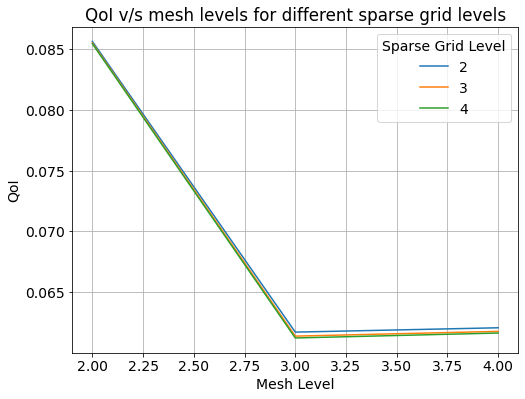

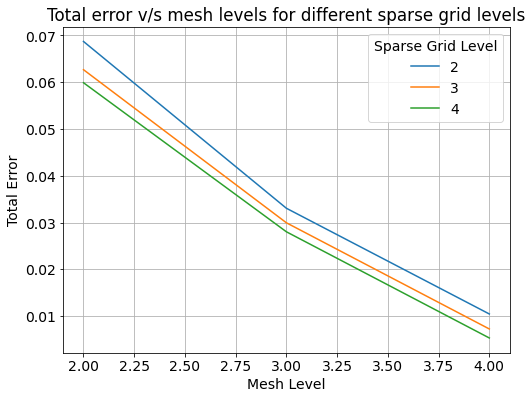

In [5]:
output_sg_QoI_data = np.reshape(output_sg_QoI_list,(len(levels), len(stochLevels)))
output_sg_TE_data = np.reshape(output_sg_TE_list,(len(levels), len(stochLevels)))

output_sg_QoI = pd.DataFrame(index=levels, columns=stochLevels, data=output_sg_QoI_data)
output_sg_TE = pd.DataFrame(index=levels, columns=stochLevels, data=output_sg_TE_data)

output_sg_QoI.index.name = 'Mesh Level'
output_sg_QoI.columns.name = 'Sparse Grid Level'
output_sg_TE.index.name = 'Mesh Level'
output_sg_TE.columns.name = 'Sparse Grid Level'

output_sg_QoI.plot(title='QoI v/s mesh levels for different sparse grid levels', figsize=(8, 6))
plt.ylabel('QoI')
plt.grid(True)

output_sg_TE.plot(title='Total error v/s mesh levels for different sparse grid levels', figsize=(8, 6))
plt.ylabel('Total Error')
plt.grid(True)

plt.show()
